## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
#basic lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

#ML lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

#model lib
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

#evaluation lib
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score

#sampling lib
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")


## Exploratory data analysis

In [2]:
df = pd.read_csv('data\creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

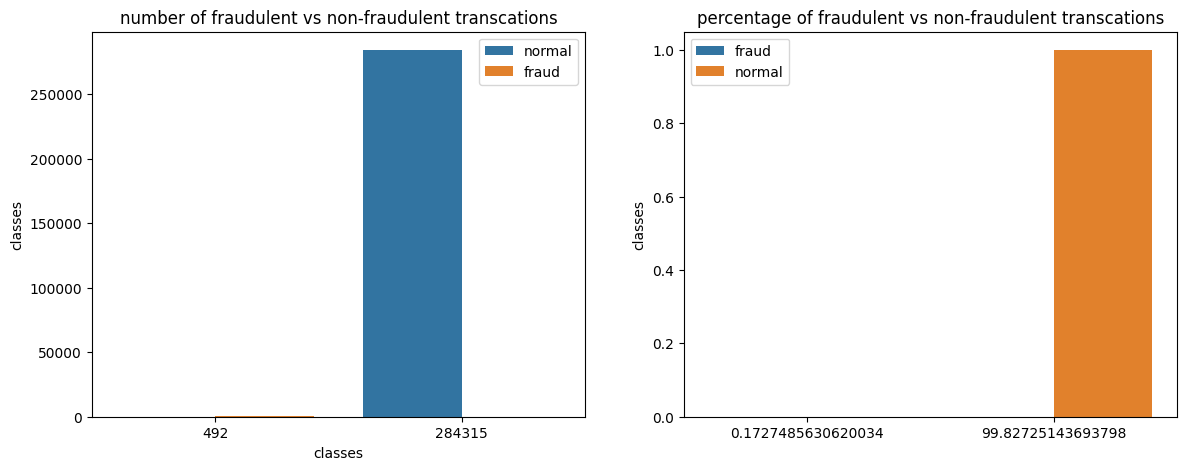

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot( x = classes, y = classes, hue = ['normal', 'fraud'])
plt.title('number of fraudulent vs non-fraudulent transcations')
plt.xlabel('classes')
plt.ylabel('classes')

plt.subplot(1,2,2)
sns.barplot(x = [fraud_share, normal_share], y = [0,1], hue = ['fraud', 'normal'])
plt.title('percentage of fraudulent vs non-fraudulent transcations')
plt.ylabel('classes')

plt.show()

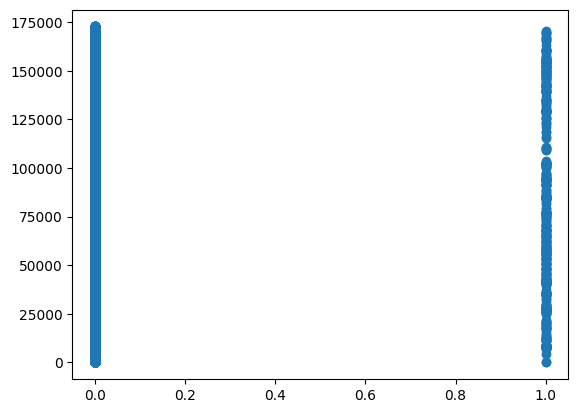

In [7]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(x = df['Class'], y = df['Time'])   
plt.show()

Text(0.5, 1.05, 'Amount vs Class Distribution')

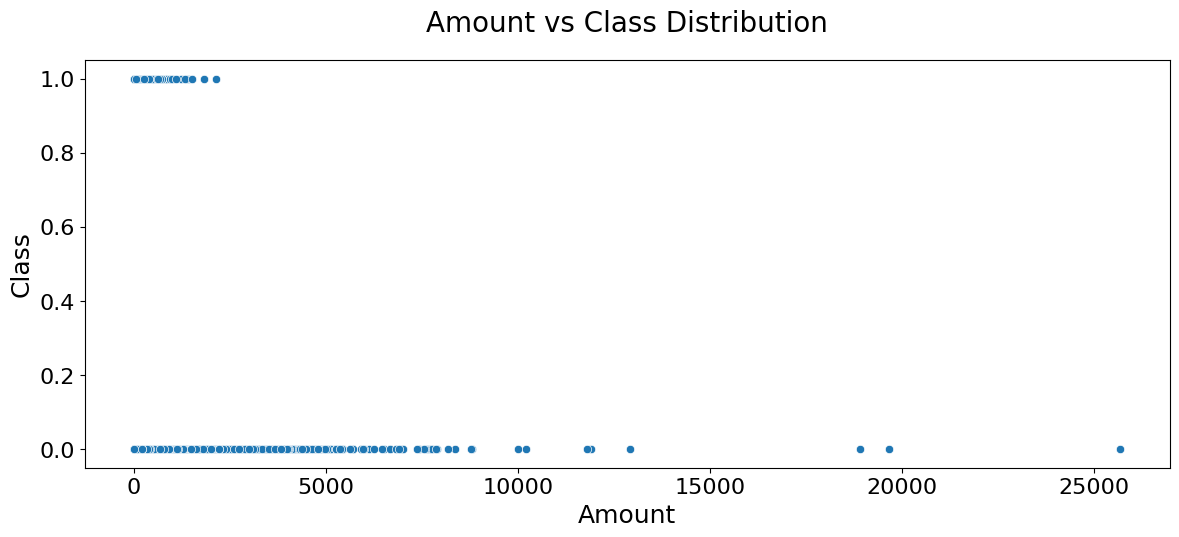

In [8]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

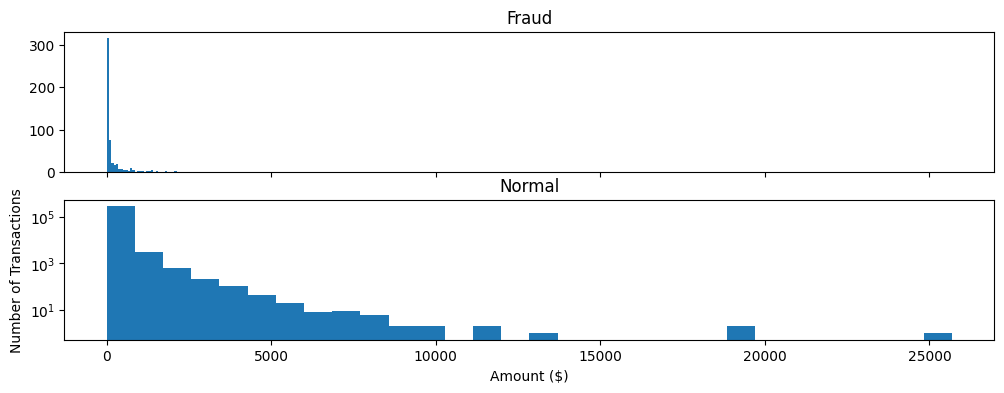

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

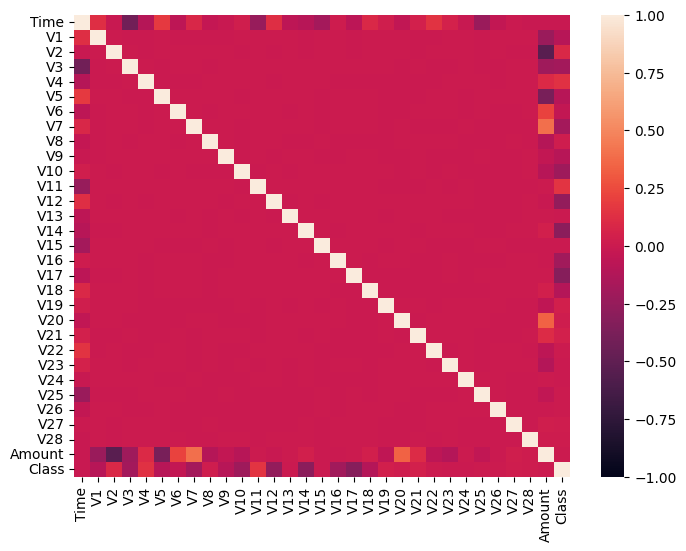

In [10]:
plt.figure(figsize=(8,6)) 
sns.heatmap(df.corr(), vmin=-1)
plt.show()



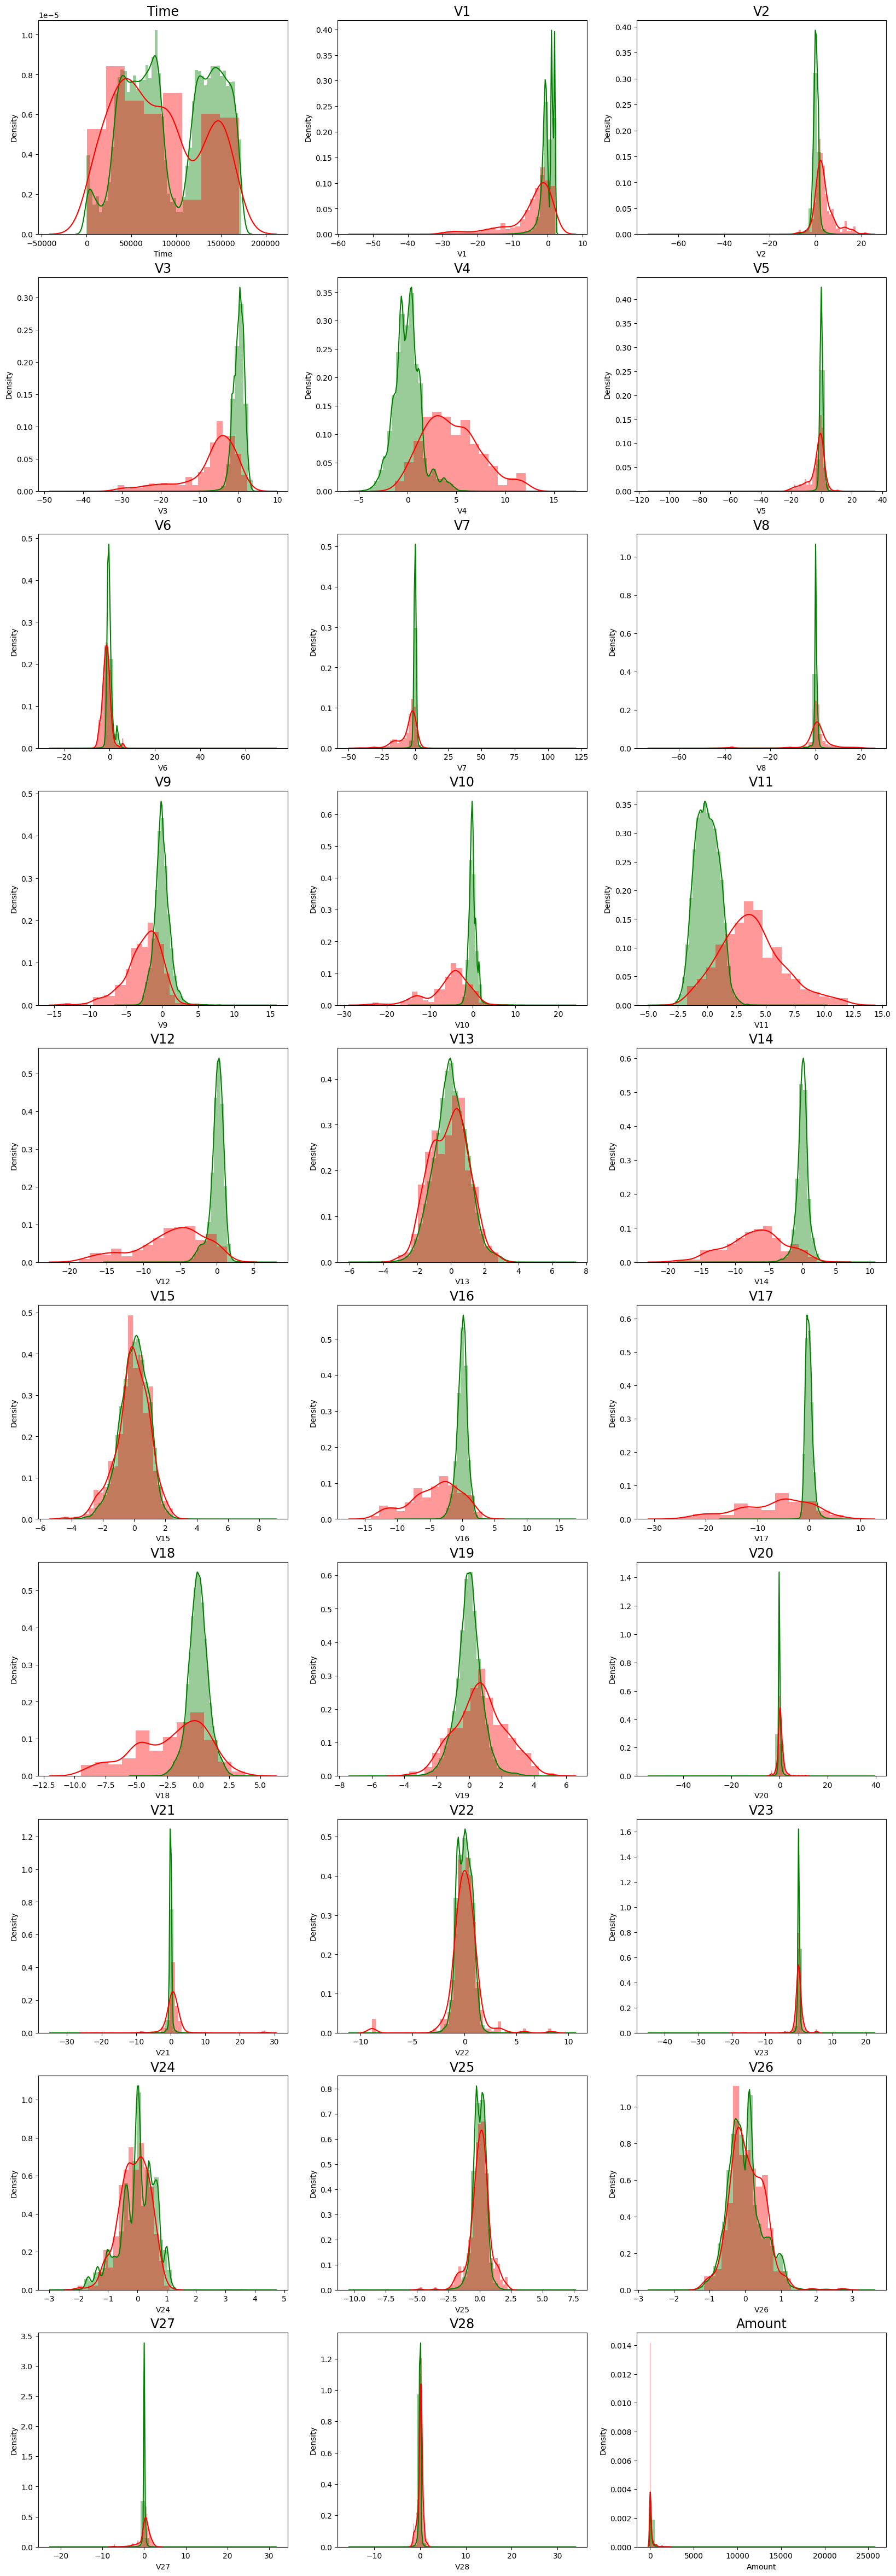

In [11]:

normal_records = df.Class == 0
fraud_records = df.Class == 1
df_new = df.drop(['Class'], axis=1)
plt.figure(figsize=(20, 60))
for n, col in enumerate(list(df_new.columns.values)):
  plt.subplot(10,3,n+1)
  sns.distplot(df_new[col][normal_records], color='green')
  sns.distplot(df_new[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [12]:
# Drop unnecessary columns
df.drop(columns=["Time"], inplace = True)

### Splitting the data into train & test data

In [13]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [14]:
y= df.Class
y.head()
X = df.drop("Class",axis=1)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size=0.75)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
379
113


In [17]:
print("y train\n", y_train.value_counts())
print("\ny test\n", y_test.value_counts())

y train
 0    213226
1       379
Name: Class, dtype: int64

y test
 0    71089
1      113
Name: Class, dtype: int64


### Plotting the distribution of a variable

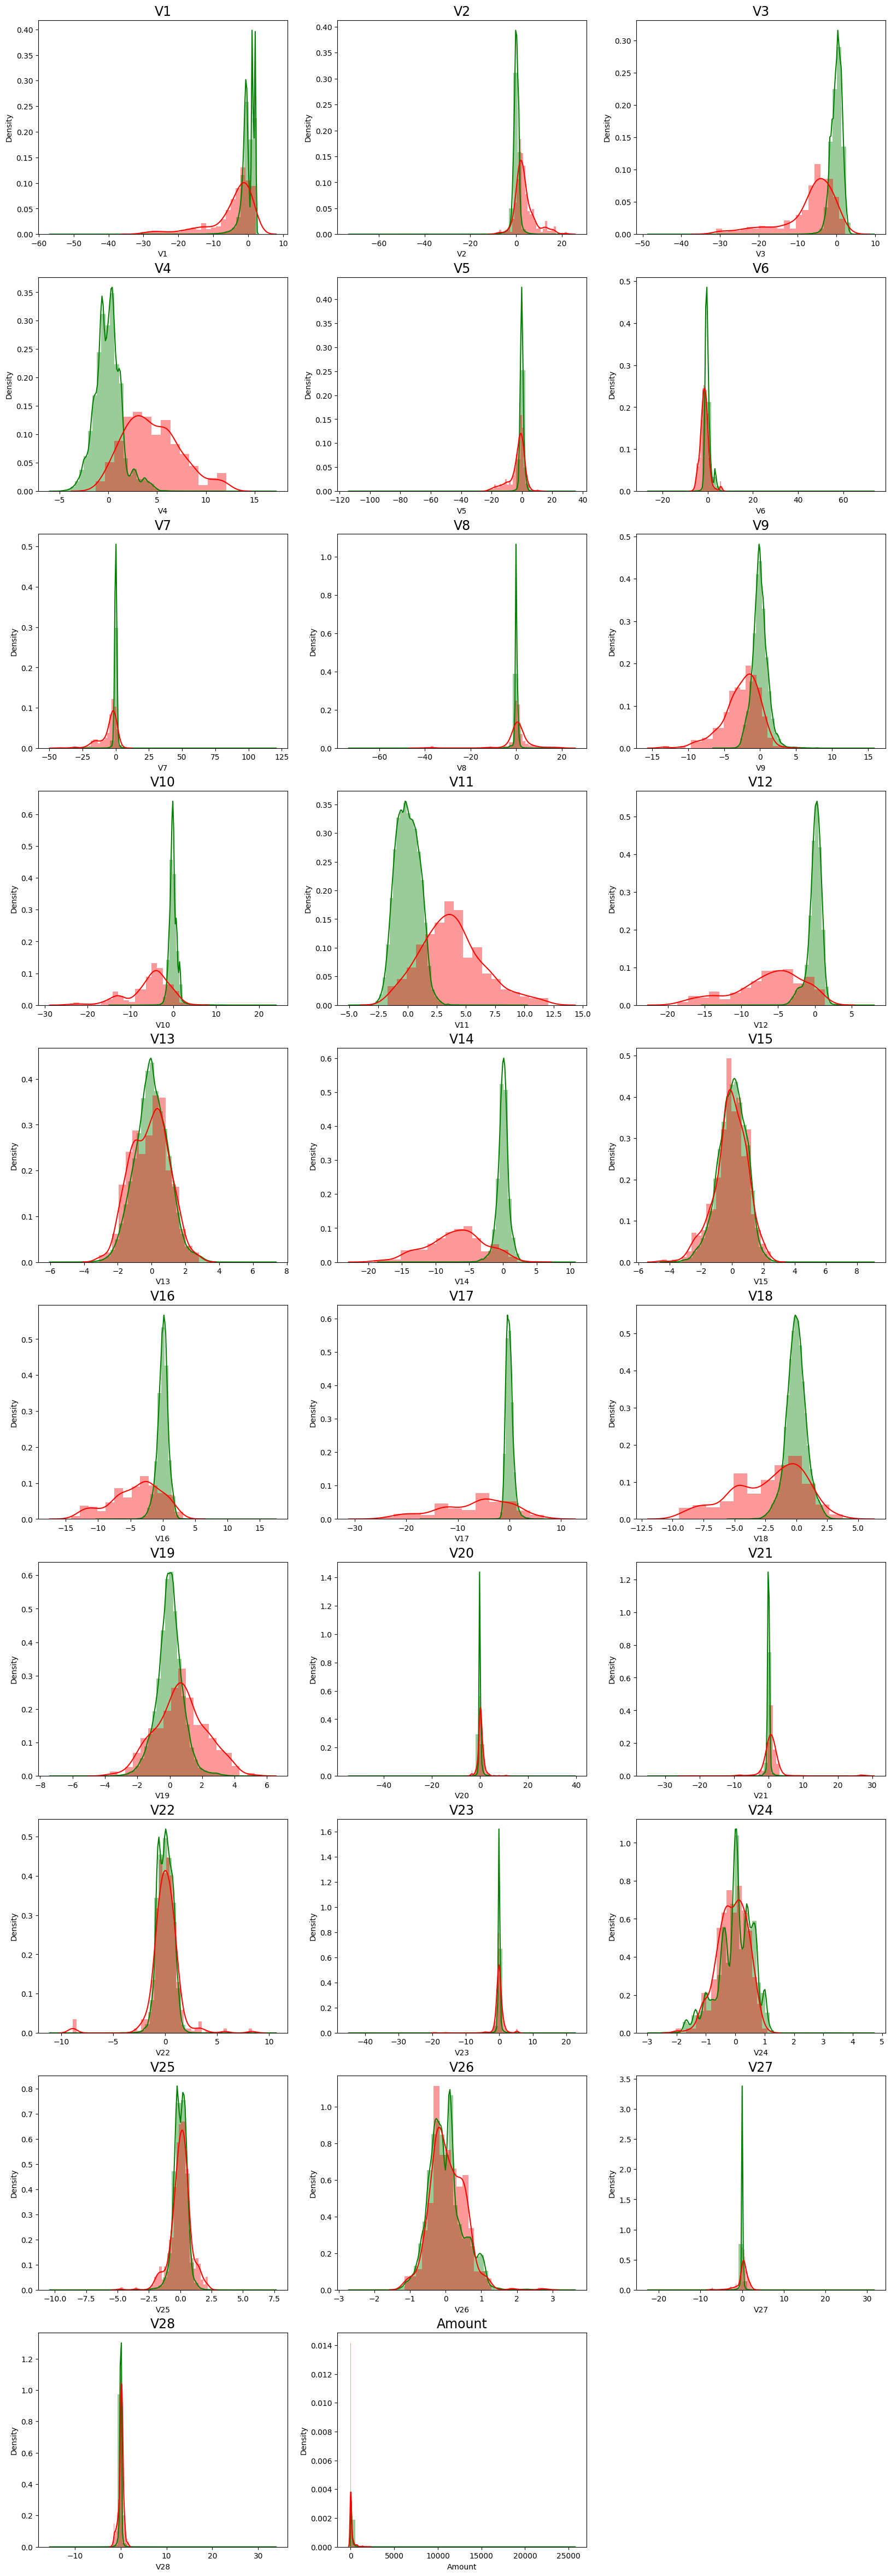

In [18]:
# plot the histogram of a variable from the dataset to see the skewness

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(list(X.columns.values)):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [20]:
pt = PowerTransformer(copy=False)
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [21]:
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=list(X_train.columns.values))
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=list(X_train.columns.values))

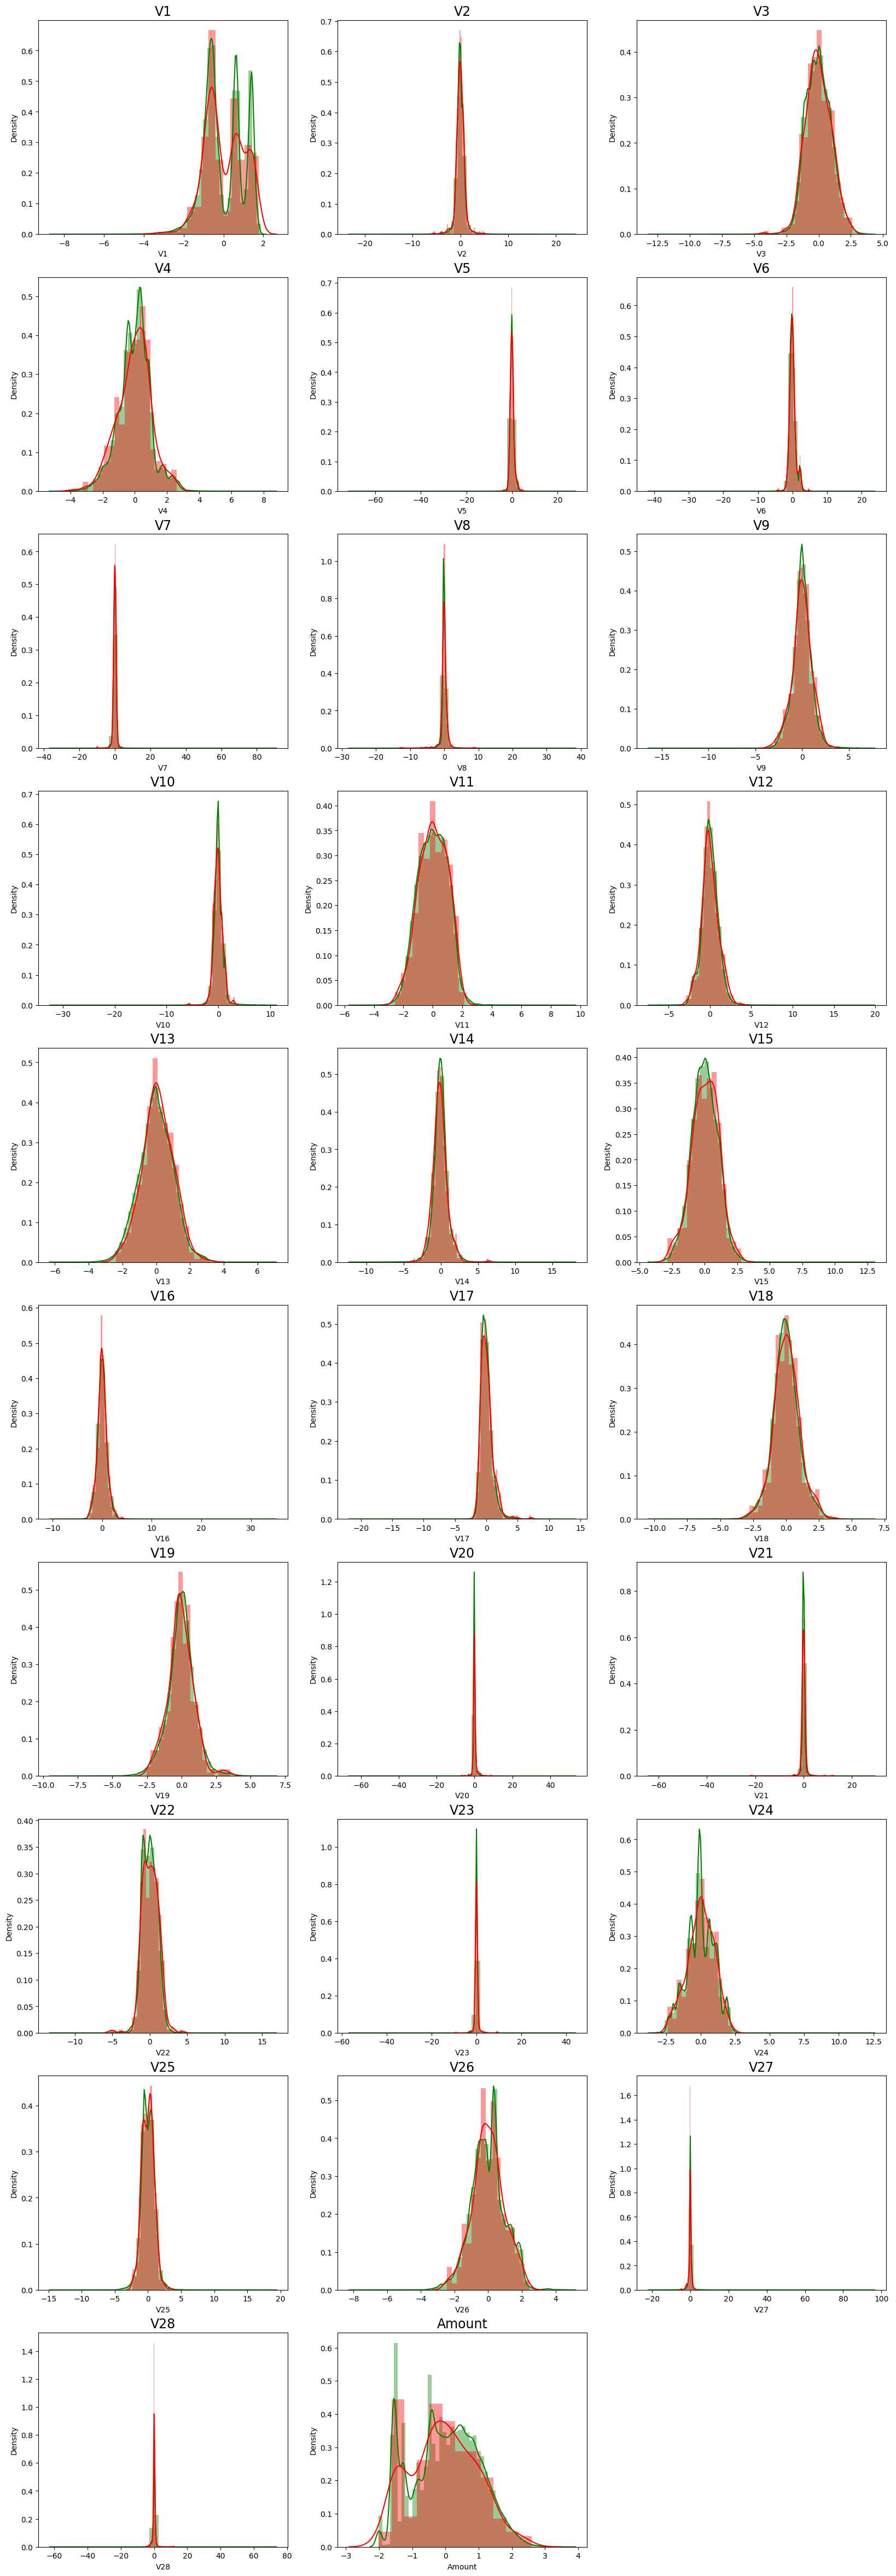

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
#Xtrain

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(X_train_pt_df.columns.values):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

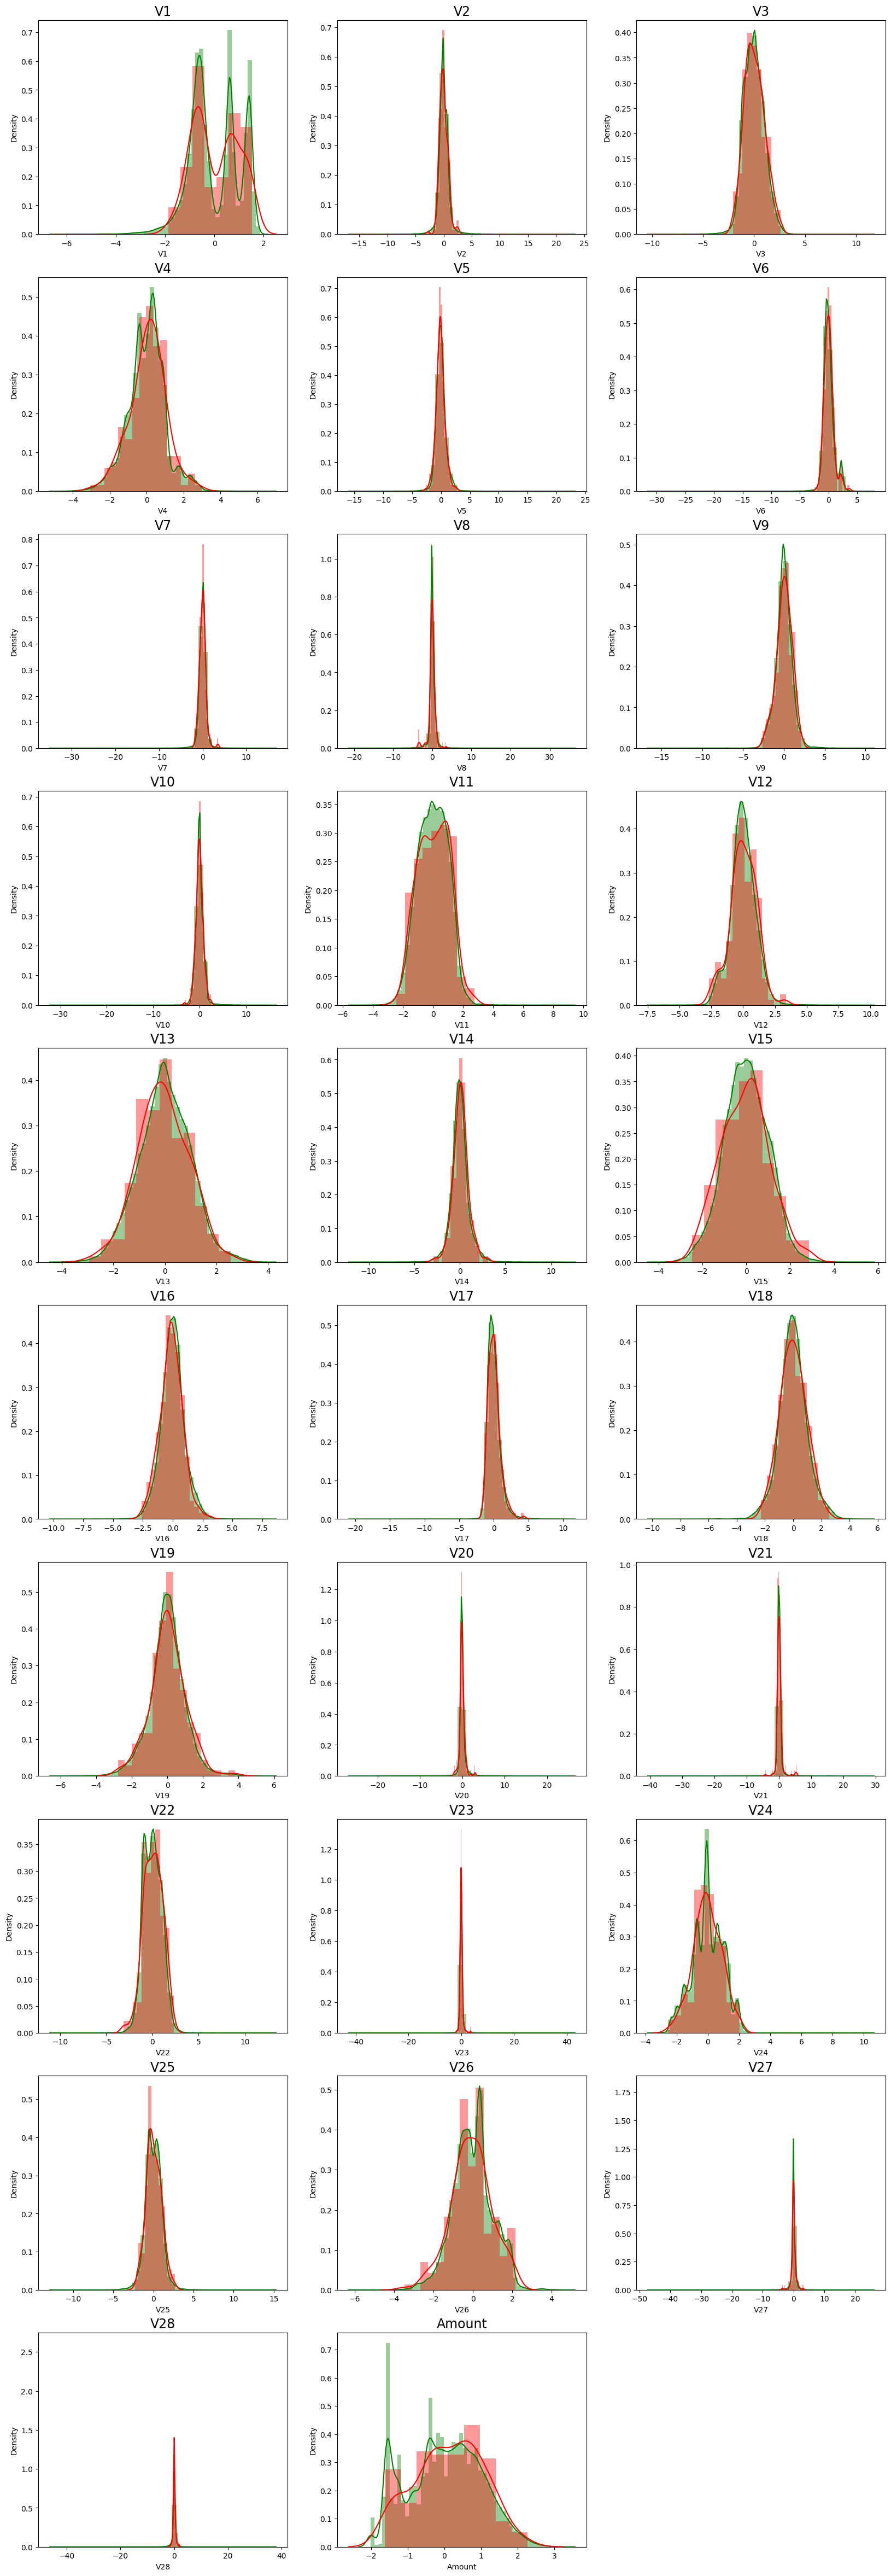

In [23]:
# plot the histogram of a variable from the dataset again to see the result 
#Xtest

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(list(X_test_pt_df.columns.values)):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [24]:
X_train, X_test = X_train_pt_df, X_test_pt_df 

## Model Building
- Build different models on the imbalanced dataset and see the result

In [25]:

num_C = 2  #--> list of values
cv_num = 5  #--> list of values

lr = LogisticRegression()
model = lr.fit(X_train_pt_df, y_train)
print(model.score(X_train_pt_df, y_train))

0.9992509538634395


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [51]:
#perform cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

#perform hyperparameter tuning
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
          'C' : [10, 1.0, 0.1, 0.01]
          }


grid_search = GridSearchCV(model, params, cv=cv, scoring='accuracy')

grid_result = grid_search.fit(X_train_pt_df, y_train)


In [56]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_

#print the optimum value of hyperparameters
print("Best Params are",best_params)
# print("Best Params are",grid_result.best_score_)

<module 'sklearn.metrics' from 'd:\\Projects\\upgrad\\credit_card_fraud\\.venv\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>
Best Params are {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [26]:
def model_builder(model, X_train, X_test, y_train, y_test):
  # model building 
  model.fit(X_train, y_train)
  
  #predicting model on test data
  y_pred = model.predict(X_test)
  # y_pred_proba = model.predict_proba(X_test)[:,1]
  
  #printing all scores
  print("Accuracy Score: ", accuracy_score(y_test, y_pred))
  print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
  # print('ROC AUC for Class 1 only =%.3f' % (roc_auc_score(y_test, y_pred_proba)))
  print("\n")
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
  print("\n")
  print("Classification Report: \n", classification_report(y_test, y_pred))
  
  plt.figure(figsize=(7, 4))
  lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(lr_fpr, lr_tpr, marker='.')
  plt.title("ROC Curve")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  
  return model
  

Accuracy Score:  0.9994522625768939
ROC AUC Score:  0.8848643175319185


Confusion Matrix: 
 [[71076    13]
 [   26    87]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.87      0.77      0.82       113

    accuracy                           1.00     71202
   macro avg       0.93      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202



KNeighborsClassifier()

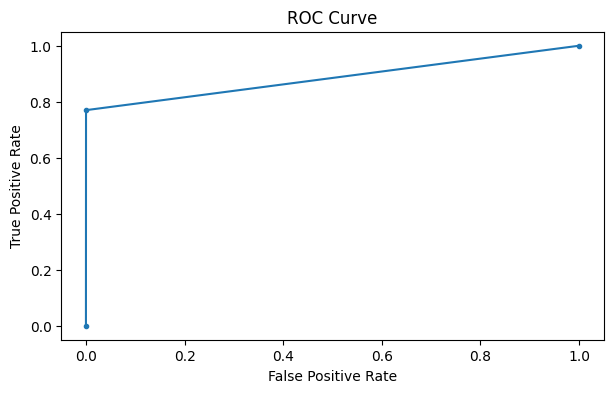

In [93]:
#KNN
model_builder(KNeighborsClassifier(), X_train_pt_df, X_test_pt_df, y_train, y_test)

Accuracy Score:  0.9993539507317211
ROC AUC Score:  0.827384394259869


Confusion Matrix: 
 [[71082     7]
 [   39    74]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.91      0.65      0.76       113

    accuracy                           1.00     71202
   macro avg       0.96      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



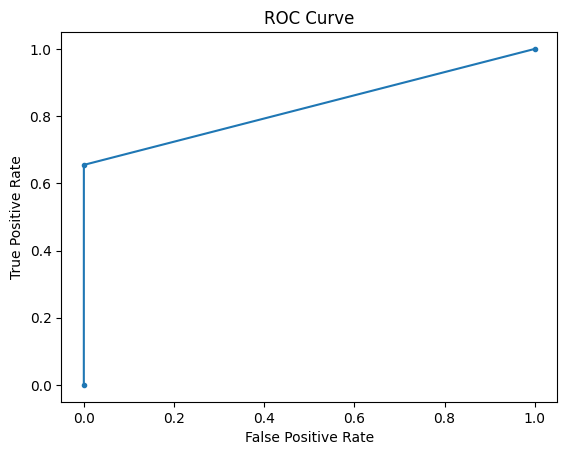

In [32]:
#SVM
model_builder(SVC(), X_train_pt_df, X_test_pt_df, y_train, y_test)


Accuracy Score:  0.9991854161399961
ROC AUC Score:  0.8847306822296916


Confusion Matrix: 
 [[71057    32]
 [   26    87]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.73      0.77      0.75       113

    accuracy                           1.00     71202
   macro avg       0.87      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202



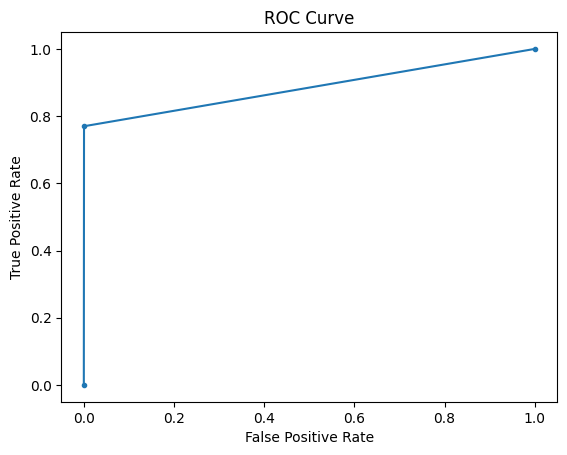

In [33]:
#Decision Tree
model_builder(DecisionTreeClassifier(), X_train_pt_df, X_test_pt_df, y_train, y_test)


Accuracy Score:  0.9995786635206876
ROC AUC Score:  0.9025985997609627


Confusion Matrix: 
 [[71081     8]
 [   22    91]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.81      0.86       113

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



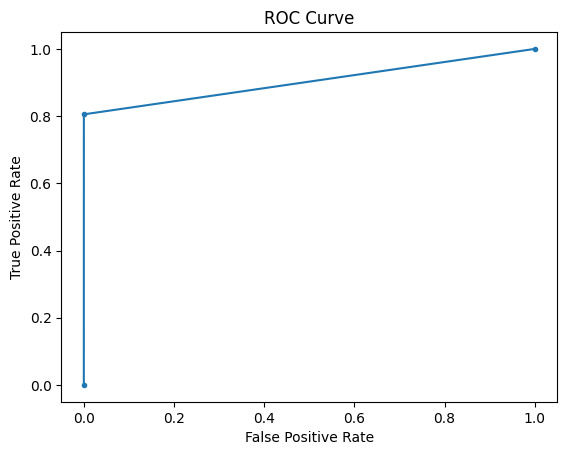

In [34]:
#Random Forest
model_builder(RandomForestClassifier(), X_train_pt_df, X_test_pt_df, y_train, y_test)


Accuracy Score:  0.9996348417179293
ROC AUC Score:  0.9026267335088


Confusion Matrix: 
 [[71085     4]
 [   22    91]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.96      0.81      0.88       113

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



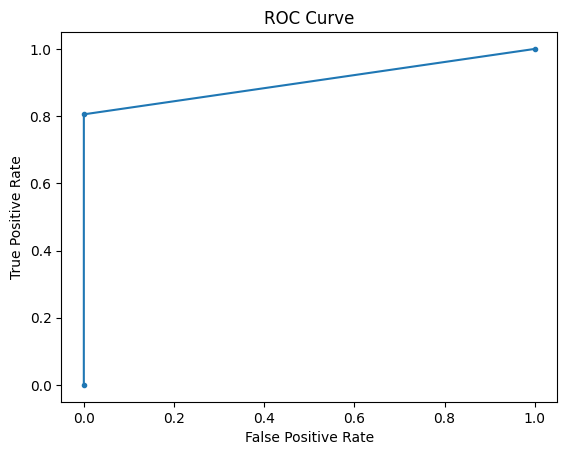

In [31]:
#XGBoost
xgc = model_builder(XGBClassifier(), X_train_pt_df, X_test_pt_df, y_train, y_test)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [40]:
print("The best hyperparameters are : ","\n")

The best hyperparameters are :  

{'colsample_bytree': 0.8692101162045277, 'gamma': 3.341187121249246, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 52.0, 'reg_lambda': 0.0017750975071820939}


In [35]:

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200], #100 200 300
    'learning_rate': [0.1, 0.01], #0.1, 0.01, 0.001
    'max_depth': [5, 7], # 3, 5, 7
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.5, 1.0],# 0, 0.5, 1.0
    'reg_alpha': [0.1, 0.5], # 0, 0.1, 0.5
    # 'reg_lambda': [0.1, 1.0, 10.0]
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv=3, scoring = 'roc_auc', verbose=2,)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters combination
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   6.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=100,

In [36]:
#Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'subsample': 0.8}


In [37]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.9800698681033969


Accuracy Score:  0.9996348417179293
ROC AUC Score:  0.9026267335088


Confusion Matrix: 
 [[71085     4]
 [   22    91]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.96      0.81      0.88       113

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



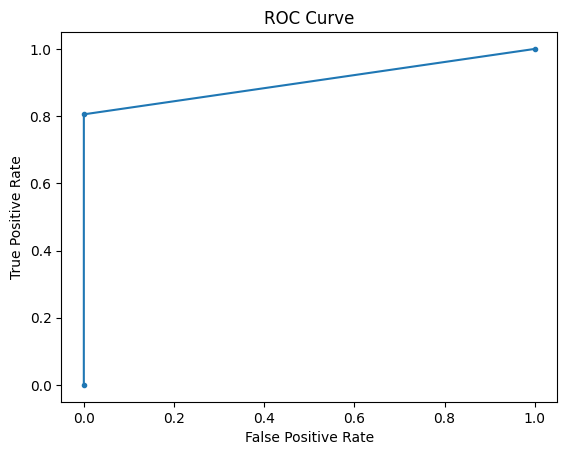

In [42]:
param = {
            'colsample_bytree': 1.0,
            'gamma': 0.5,
            'learning_rate': 0.1,
            'max_depth': 7,
            'n_estimators': 100,
            'reg_alpha': 0.1,
            'subsample': 0.8
    }

clf = model_builder(XGBClassifier(**param), X_train_pt_df, X_test_pt_df, y_train, y_test)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


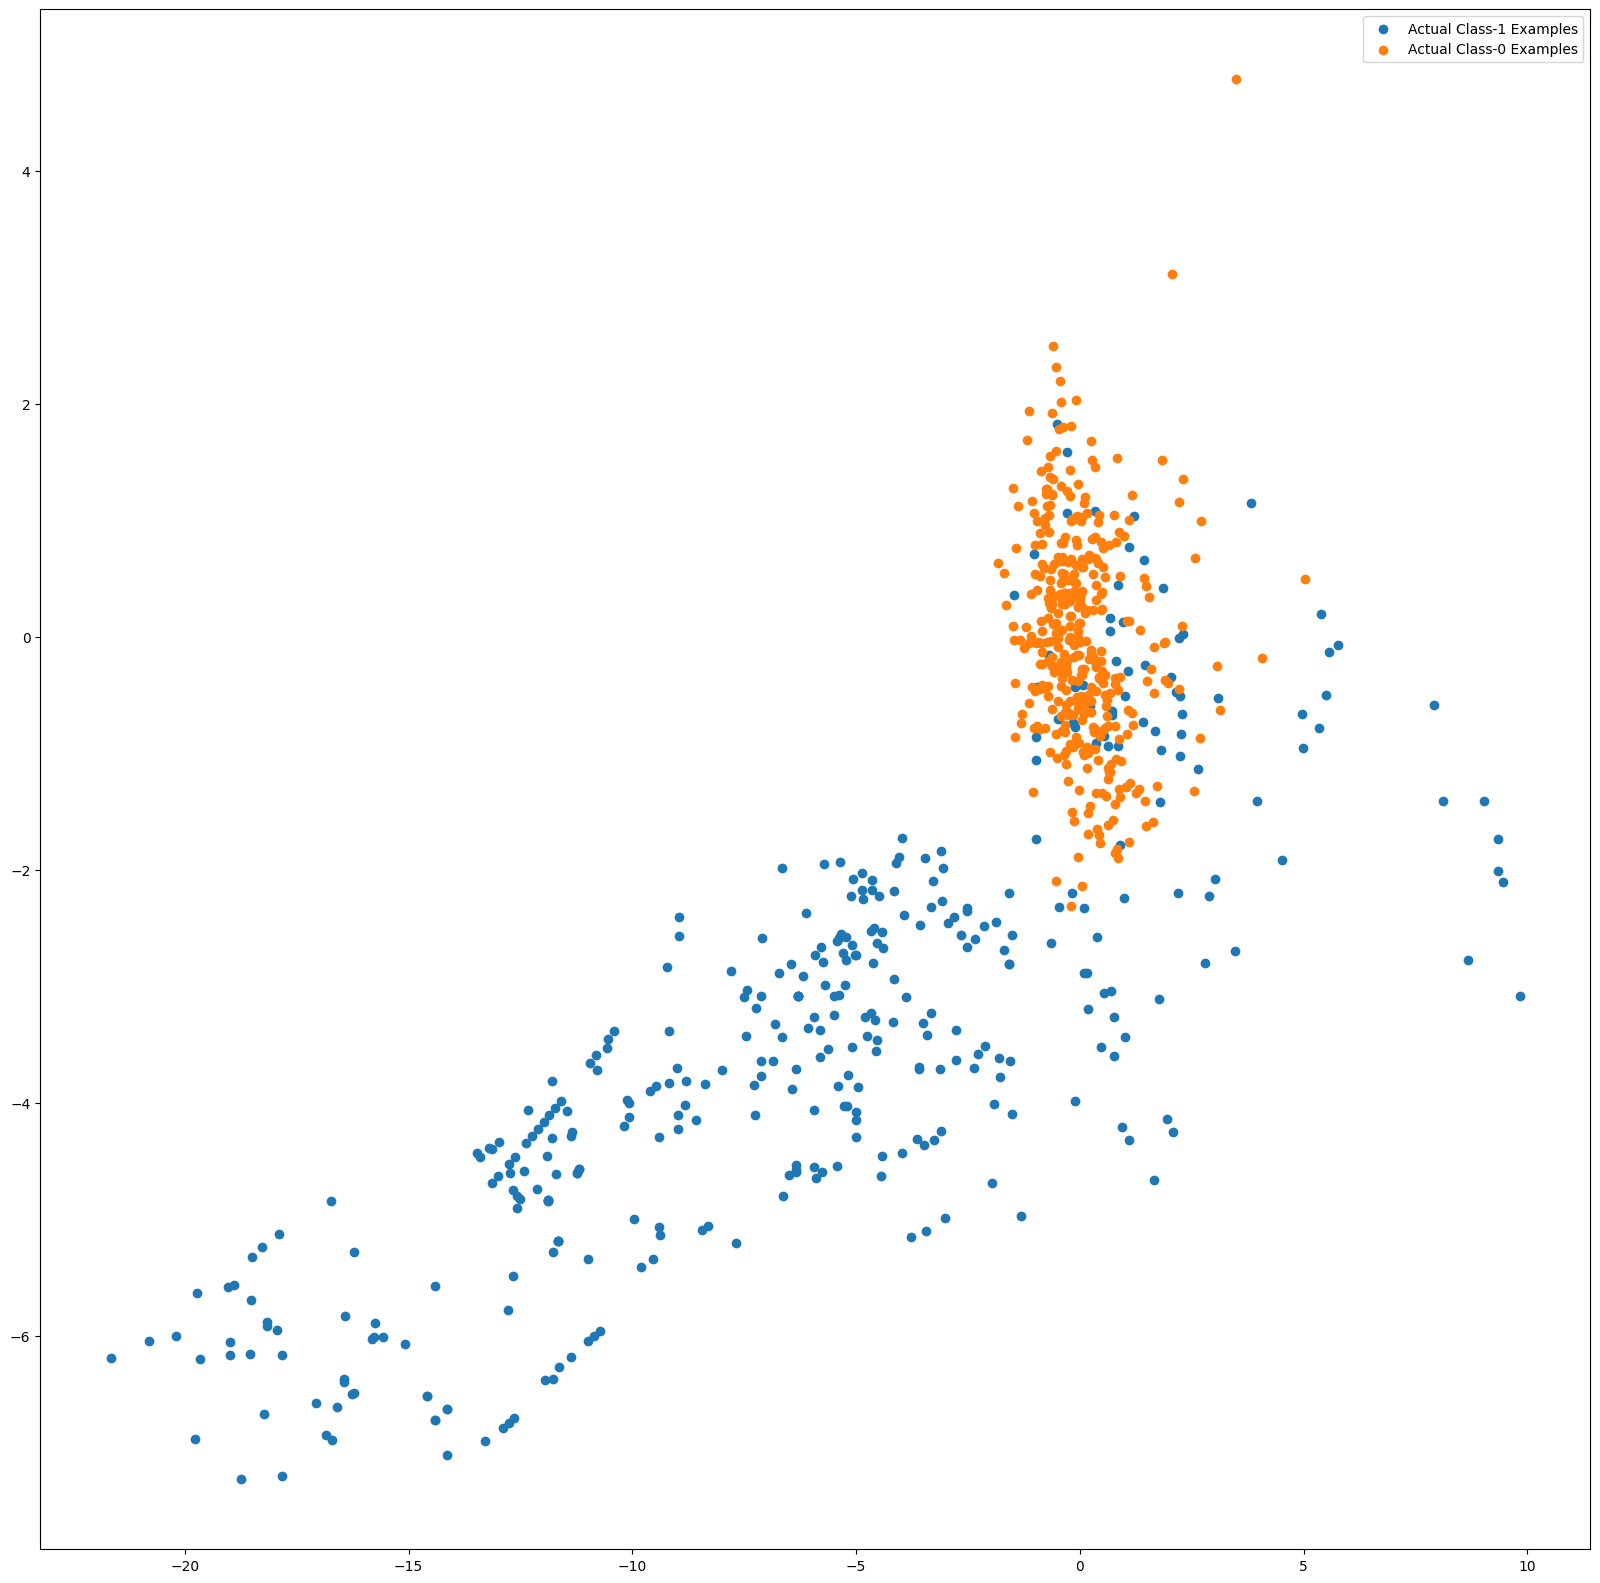

In [43]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [26]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = 2  #--> list of values
cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

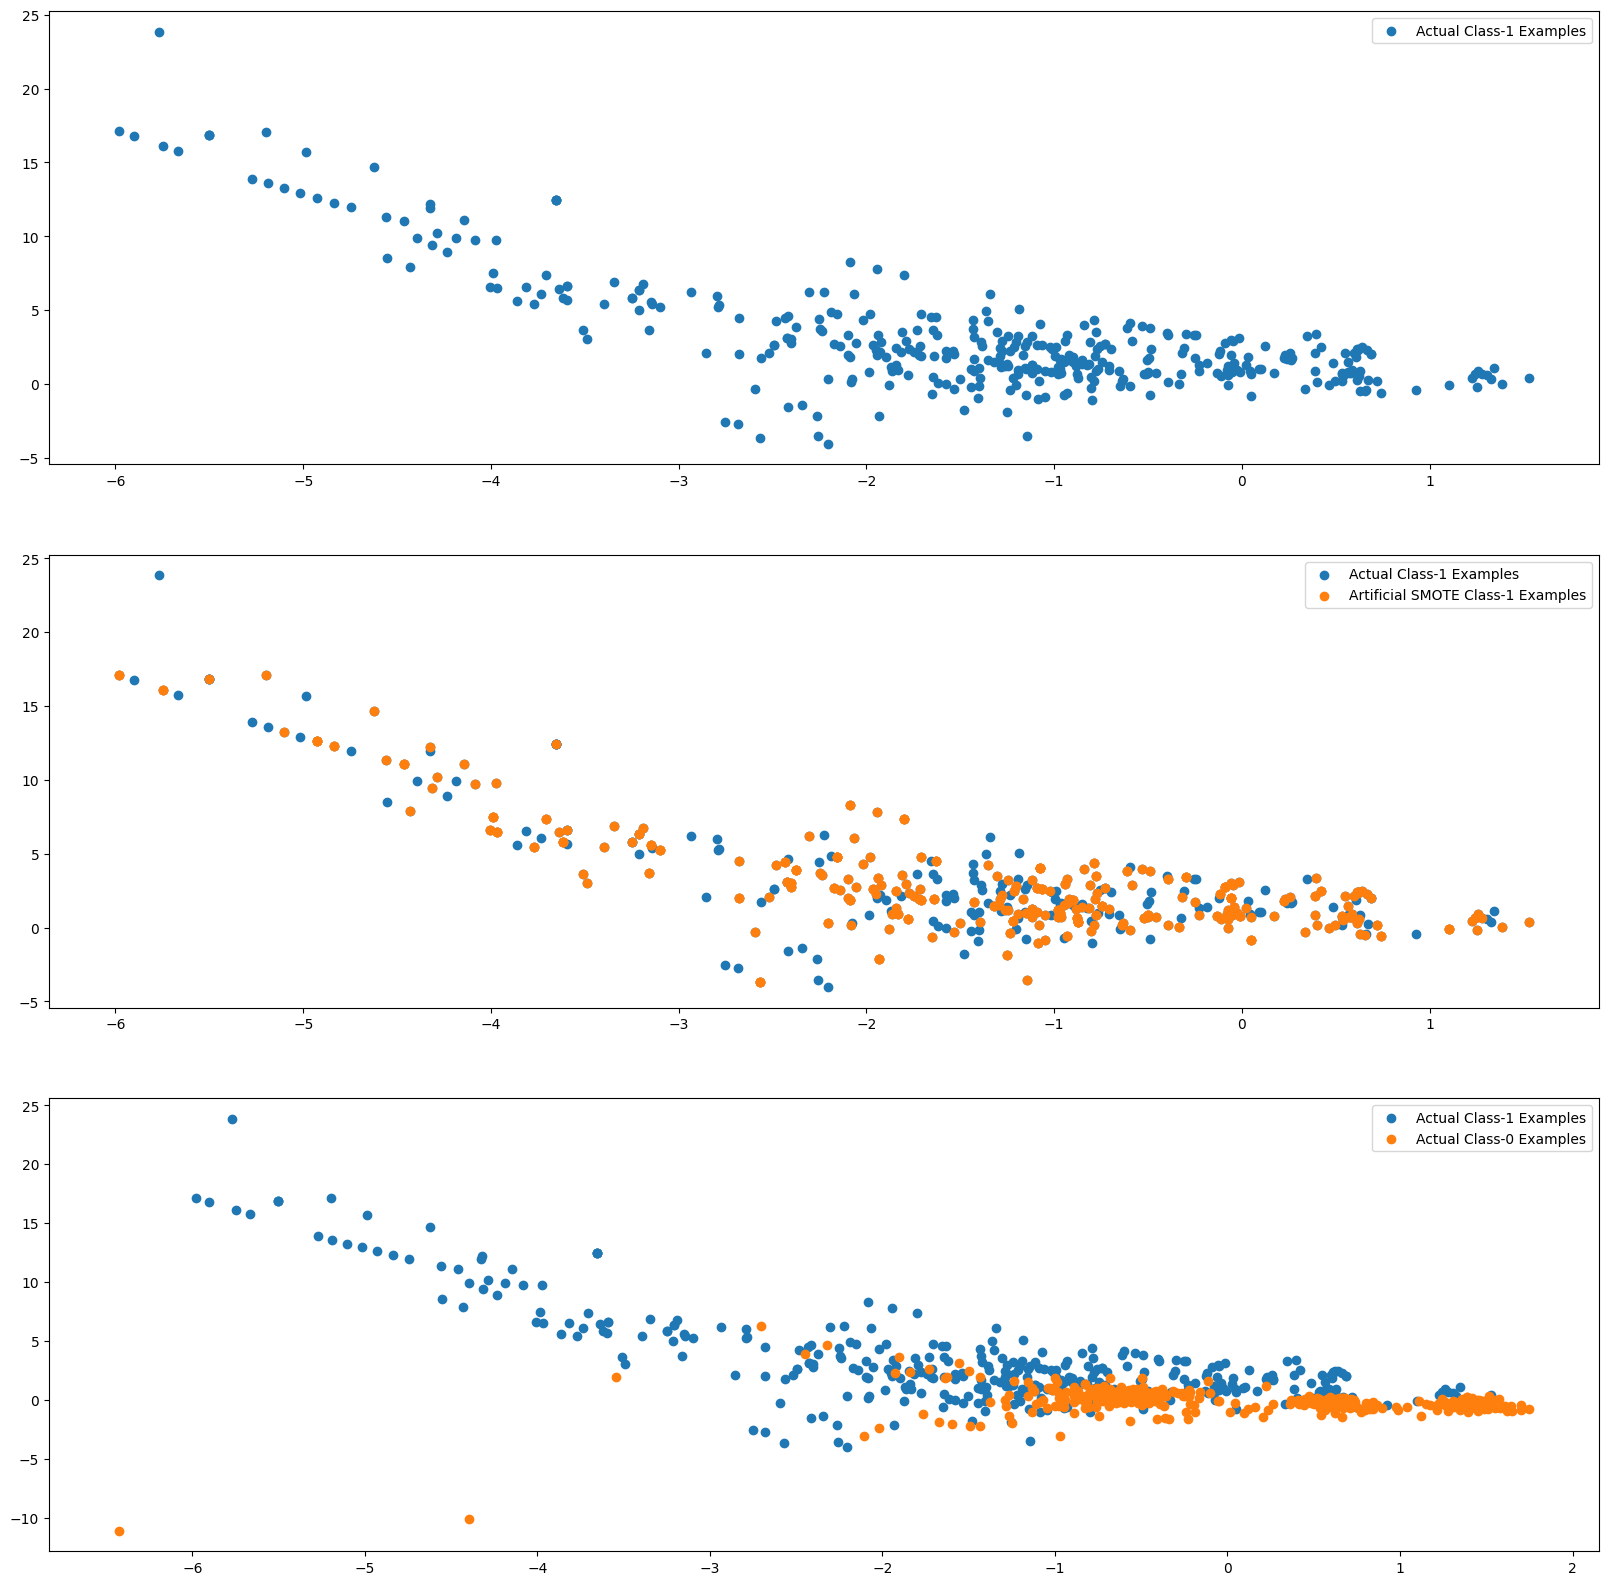

In [56]:

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_ros_1 = X_train_ros[X_train.shape[0]:]
X_train_ros_1 = X_train_ros_1.to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1[:X_train_1.shape[0], 0], X_train_ros_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [75]:

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

auc_scores = []
best_clf = []

for i,(train_index, test_index) in enumerate(cv.split(X_train, y_train)):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train_cv, y_train_cv)
    print(X_train_ros.shape, y_train_ros.shape)
    
    #perform grid search for the best C value on X_train_ros & y_train_ros
    clf = LogisticRegression()
    
    #hyper parameters tuning
    params = {
                'penalty' : ['l1', 'l2', 'none'],
                'C' : [10, 1.0, 0.1, 0.01]
          }
    
    grid_clf_acc = GridSearchCV(clf, param_grid = params, scoring = 'roc_auc', verbose = 2)
    grid_clf_acc.fit(X_train_ros, y_train_ros)
    
    #predict X_test_ros using the best_estimator_ and store it in y_pred
    y_pred = grid_clf_acc.best_estimator_.predict(X_test_cv)
    
    #calculate roc_auc_score for y_test_cv and y_pred_prob and store it in acc
    acc = roc_auc_score(y_test_cv, y_pred)
    
    #store the roc_auc_score for that value of C in auc_scores
    auc_scores.append(acc)
    
    #store the best_estimator_ for that value of C in best_clf
    best_clf.append(grid_clf_acc.best_estimator_)
    
    #print out the auc_scores[i] and best_clf[i]
    print(auc_scores[i])
    print(best_clf[i])


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [38]:
y_train.value_counts()

0    213226
1       379
Name: Class, dtype: int64

In [39]:

def random_oversampling(model, X_train, y_train, X_test, y_test):
    # cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    ros = RandomOverSampler(random_state=42)

    X_train_ros, y_train_ros =  ros.fit_resample(X_train, y_train)
    print("class size before random sampling")
    print(y_train.value_counts())
    print("class size after random sampling")
    print(y_train_ros.value_counts())
    
    model.fit(X_train_ros, y_train_ros)
    
    #predicting model on test data
    y_pred = model.predict(X_test)
    
    #printing all scores
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
    print("\n")
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(7, 4))
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(lr_fpr, lr_tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9991011488441336
ROC AUC Score:  0.933283680173065


Confusion Matrix: 
 [[71040    49]
 [   15    98]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.67      0.87      0.75       113

    accuracy                           1.00     71202
   macro avg       0.83      0.93      0.88     71202
weighted avg       1.00      1.00      1.00     71202



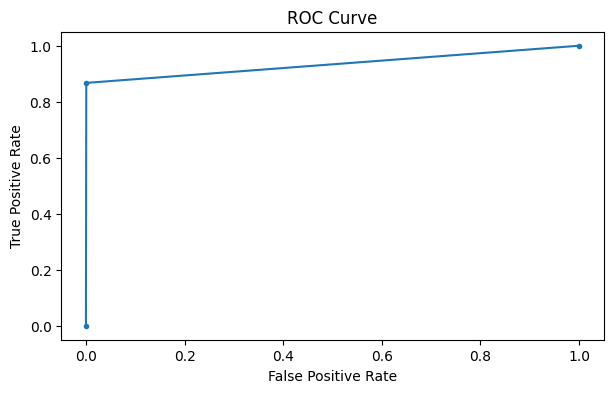

In [40]:
#KNN
random_oversampling(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [38]:
#SVM
random_oversampling(SVC(), X_train, y_train, X_test, y_test)

TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [     5      7     11 ... 213585 213588 213589]
(341160, 29) (341160,)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9990730597455127
ROC AUC Score:  0.8581679427894013


Confusion Matrix: 
 [[71055    34]
 [   32    81]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.70      0.72      0.71       113

    accuracy                           1.00     71202
   macro avg       0.85      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



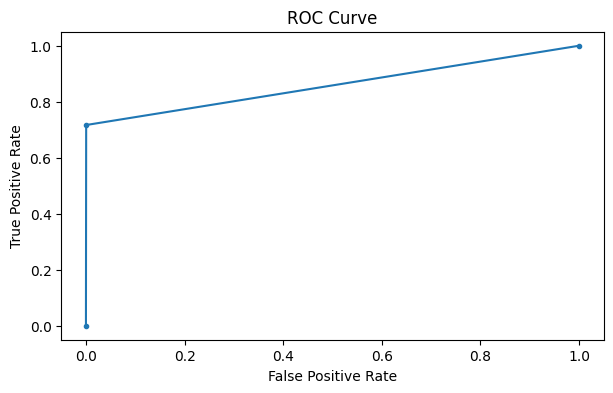

In [42]:
#Decision Tree
random_oversampling(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9995786635206876
ROC AUC Score:  0.8893453637886547


Confusion Matrix: 
 [[71084     5]
 [   25    88]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.95      0.78      0.85       113

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



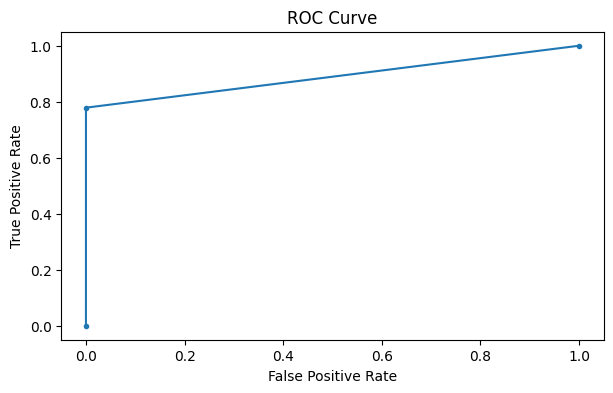

In [43]:
#Random Forest
random_oversampling(RandomForestClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9995786635206876
ROC AUC Score:  0.911434090409168


Confusion Matrix: 
 [[71079    10]
 [   20    93]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.90      0.82      0.86       113

    accuracy                           1.00     71202
   macro avg       0.95      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202



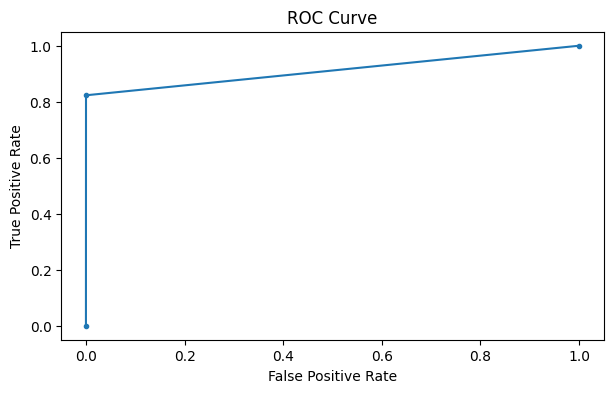

In [44]:
#XGBoost
random_oversampling(XGBClassifier(), X_train, y_train, X_test, y_test)

### Print the class distribution after applying SMOTE 

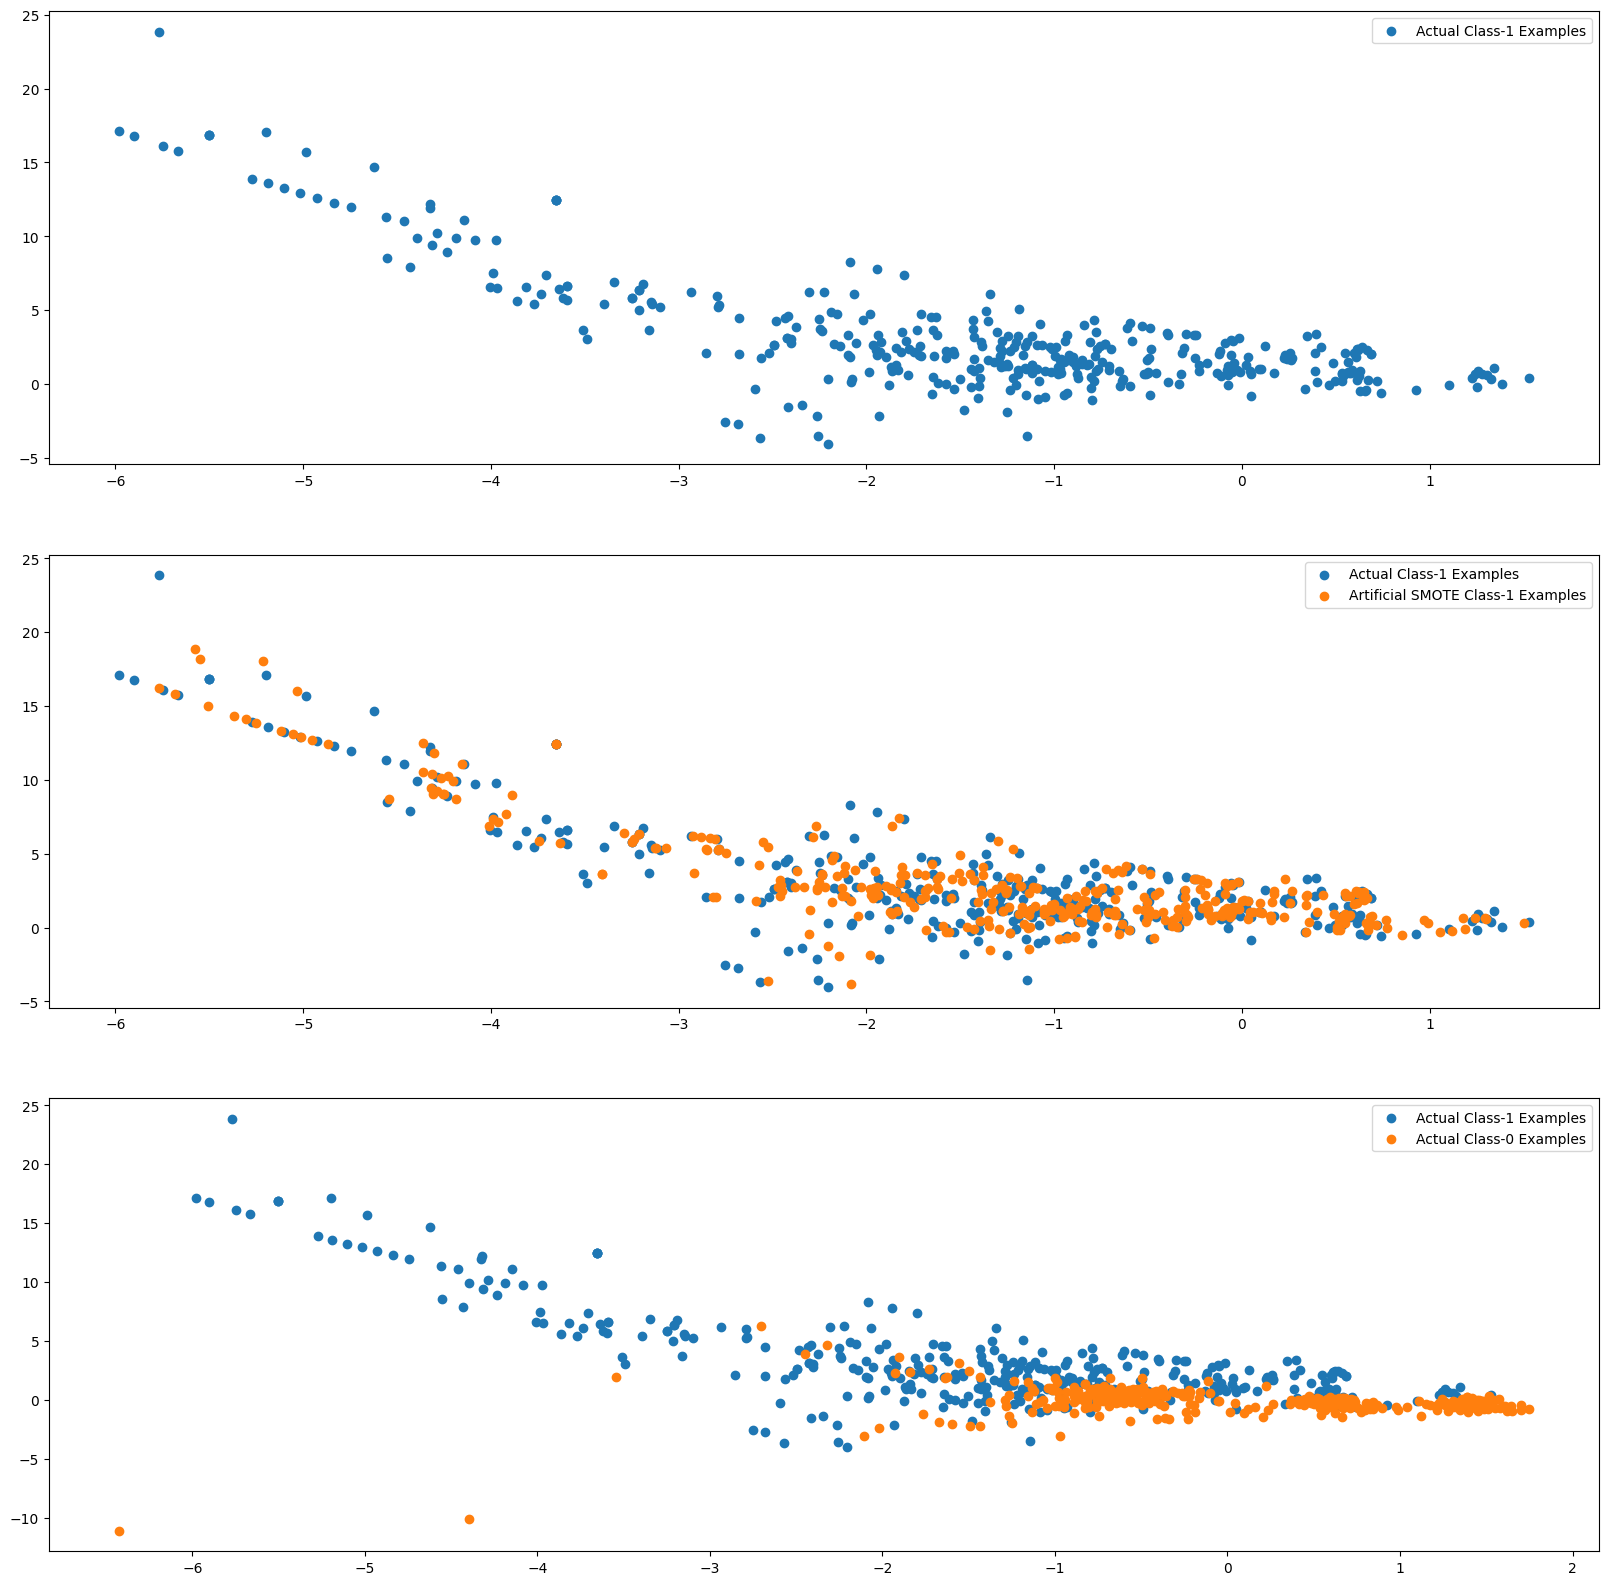

In [25]:

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_smote_1 = X_train_smote_1.to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE


In [26]:

def smote_oversampling(model, X_train, y_train, X_test, y_test):
    # cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    smote = over_sampling.SMOTE(random_state=42)

    X_train_smote, y_train_smote =  smote.fit_resample(X_train, y_train)
    print("class size before random sampling")
    print(y_train.value_counts())
    print("class size after random sampling")
    print(y_train_smote.value_counts())
    
    model.fit(X_train_smote, y_train_smote)
    
    #predicting model on test data
    y_pred = model.predict(X_test)
    
    #printing all scores
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
    print("\n")
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(7, 4))
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(lr_fpr, lr_tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9981180303924047
ROC AUC Score:  0.9416268302341189


Confusion Matrix: 
 [[70968   121]
 [   13   100]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.45      0.88      0.60       113

    accuracy                           1.00     71202
   macro avg       0.73      0.94      0.80     71202
weighted avg       1.00      1.00      1.00     71202



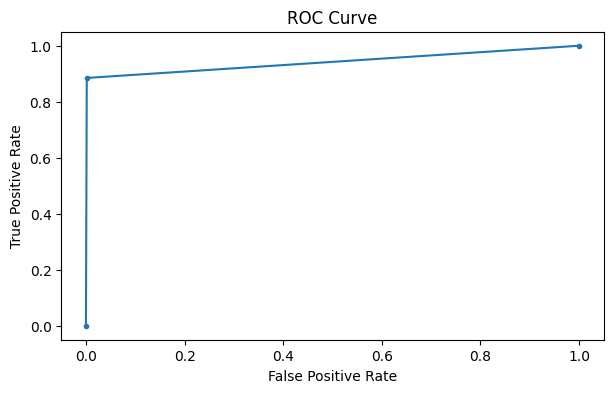

In [49]:
#KNN
smote_oversampling(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [50]:
#SVM
smote_oversampling(SVC(), X_train, y_train, X_test, y_test)

class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9974298474761945
ROC AUC Score:  0.8794337572856759


Confusion Matrix: 
 [[70933   156]
 [   27    86]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.36      0.76      0.48       113

    accuracy                           1.00     71202
   macro avg       0.68      0.88      0.74     71202
weighted avg       1.00      1.00      1.00     71202



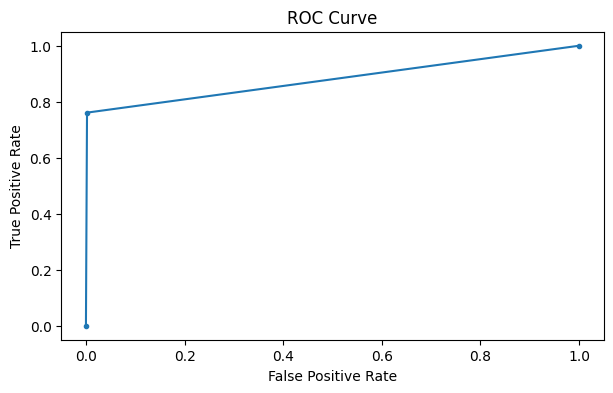

In [27]:
#Decision Tree
smote_oversampling(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9994803516755147
ROC AUC Score:  0.9246380923227608


Confusion Matrix: 
 [[71069    20]
 [   17    96]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.85      0.84       113

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202



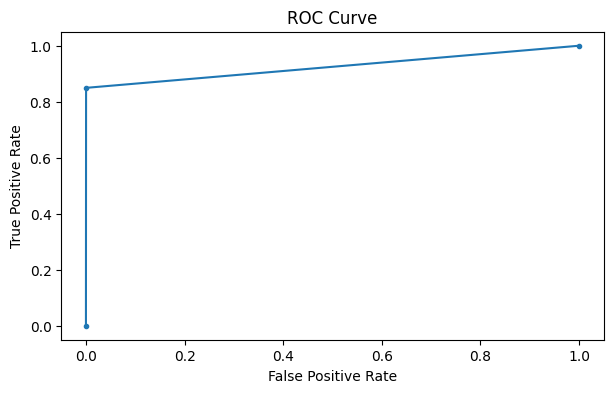

In [28]:
#Random Forest
smote_oversampling(RandomForestClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9992977725344794
ROC AUC Score:  0.9333821482904952


Confusion Matrix: 
 [[71054    35]
 [   15    98]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.74      0.87      0.80       113

    accuracy                           1.00     71202
   macro avg       0.87      0.93      0.90     71202
weighted avg       1.00      1.00      1.00     71202



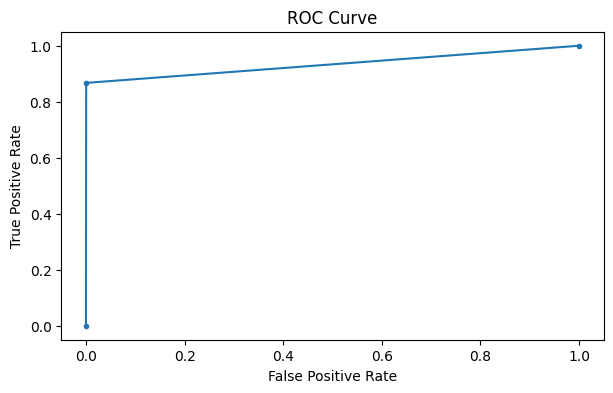

In [29]:
#XGBoost
smote_oversampling(XGBClassifier(), X_train, y_train, X_test, y_test)

In [35]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
sm = over_sampling.SMOTE(random_state=42)
model = XGBClassifier()

param = {
            'colsample_bytree': [1.0],
            'gamma': [0.5],
            'learning_rate': [0.1],
            'max_depth': [7],
            'n_estimators': [100],
            'reg_alpha': [0.1],
            'subsample': [0.8]
    }


X_train_cv, y_train_cv = [], []

for i,(train_index, test_index) in enumerate(cv.split(X_train,y_train)):
    X_train_smote, y_train_smote =  sm.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_train_cv.append(X_train_smote)
    y_train_cv.append(y_train_smote)

X_train_cv = np.concatenate(X_train_cv)
y_train_cv = np.concatenate(y_train_cv)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param, scoring='roc_auc', cv = cv, verbose = 2)
grid_search.fit(X_train_cv, y_train_cv)

# Print the evaluation result
print("Evaluation result:")
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time= 1.8min
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time= 1.7min
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time= 1.7min
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time= 1.8min
Evaluation result:
Best accuracy: 0.9999925340195164
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.1, 'subsample': 0.8}


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
0    213226
1    213226
Name: Class, dtype: int64
Accuracy Score:  0.9981180303924047
ROC AUC Score:  0.9372090849100161


Confusion Matrix: 
 [[70969   120]
 [   14    99]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.45      0.88      0.60       113

    accuracy                           1.00     71202
   macro avg       0.73      0.94      0.80     71202
weighted avg       1.00      1.00      1.00     71202



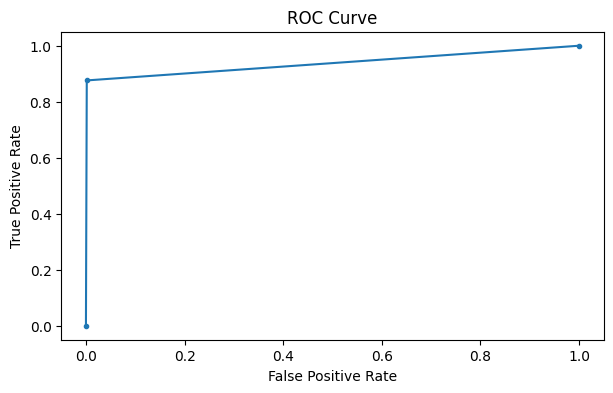

In [36]:
#XGBoost
param = {
            'colsample_bytree': 1.0,
            'gamma': 0.5,
            'learning_rate': 0.1,
            'max_depth': 7,
            'n_estimators': 100,
            'reg_alpha': 0.1,
            'subsample': 0.8
    }

smote_oversampling(XGBClassifier(**param), X_train, y_train, X_test, y_test)

### Print the class distribution after applying ADASYN

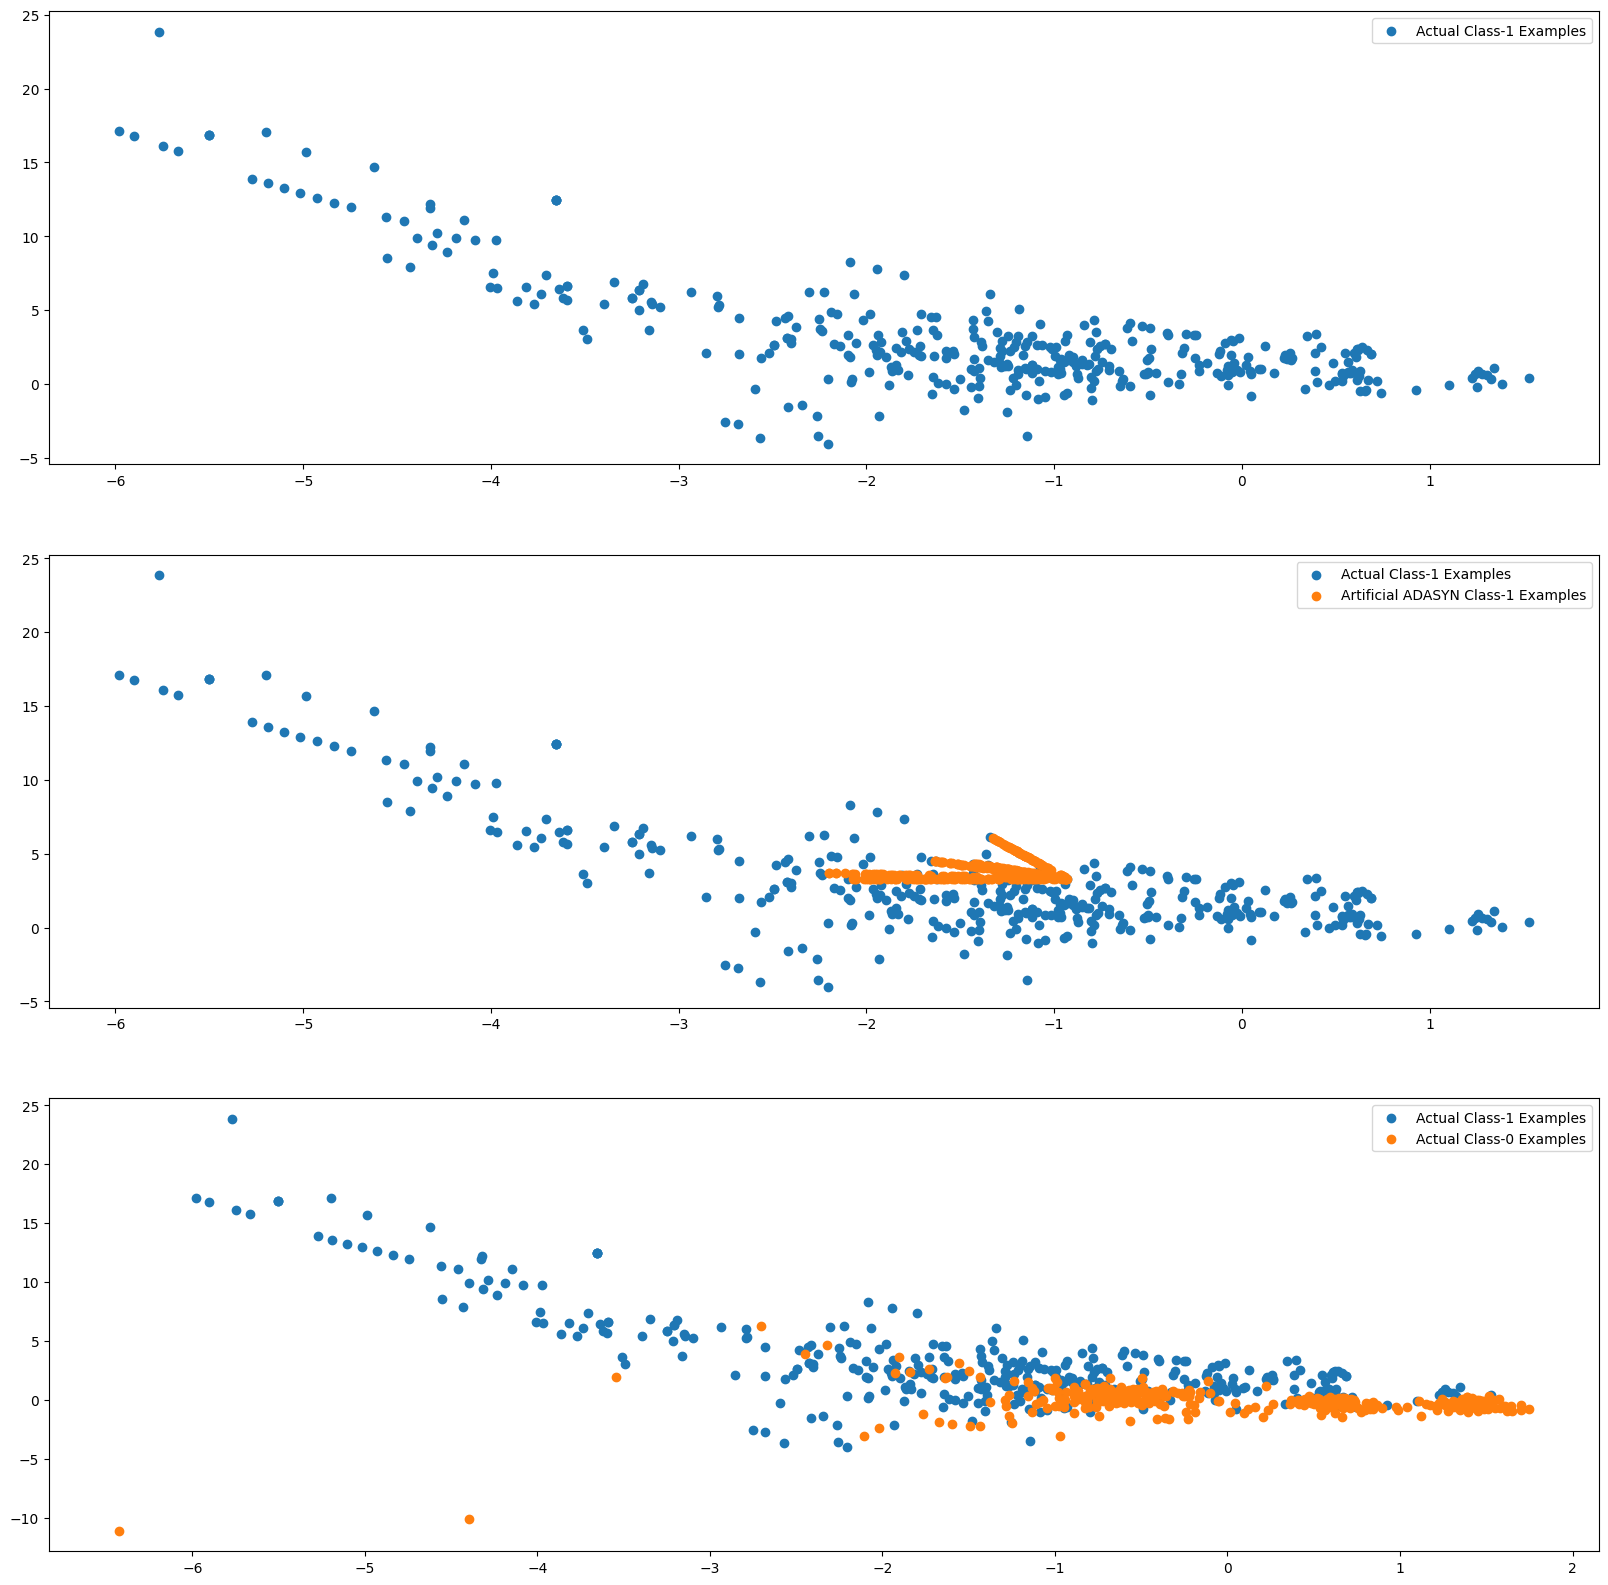

In [38]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]
X_train_adasyn_1 = X_train_adasyn_1.to_numpy()


X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

In [50]:

def adasyn_oversampling(model, X_train, y_train, X_test, y_test):
    # cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    adasyn = over_sampling.ADASYN(random_state=42)

    X_train_adasyn, y_train_adasyn =  adasyn.fit_resample(X_train, y_train)
    print("class size before random sampling")
    print(y_train.value_counts())
    print("class size after random sampling")
    print(y_train_adasyn.value_counts())
    
    model = model.fit(X_train_adasyn, y_train_adasyn)
    
    #predicting model on test data
    y_pred = model.predict(X_test)
    
    #printing all scores
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
    print("\n")
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(7, 4))
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(lr_fpr, lr_tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    return model
    


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
1    213229
0    213226
Name: Class, dtype: int64
Accuracy Score:  0.9981039858430943
ROC AUC Score:  0.9416197967971596


Confusion Matrix: 
 [[70967   122]
 [   13   100]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.45      0.88      0.60       113

    accuracy                           1.00     71202
   macro avg       0.73      0.94      0.80     71202
weighted avg       1.00      1.00      1.00     71202



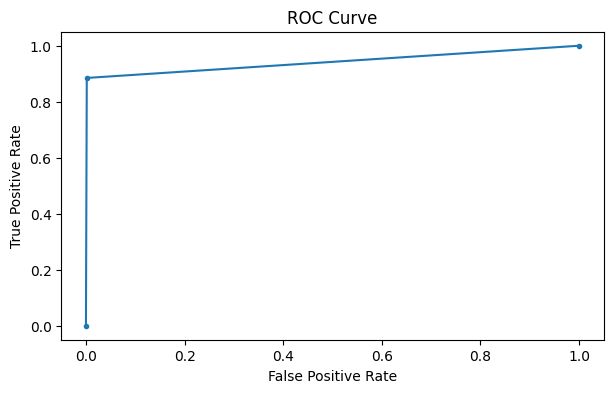

In [41]:
#KNN
adasyn_oversampling(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
#SVM
smote_oversampling(SVC(), X_train, y_train, X_test, y_test)

class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
1    213229
0    213226
Name: Class, dtype: int64
Accuracy Score:  0.9978792730541277
ROC AUC Score:  0.8929120632406817


Confusion Matrix: 
 [[70962   127]
 [   24    89]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.41      0.79      0.54       113

    accuracy                           1.00     71202
   macro avg       0.71      0.89      0.77     71202
weighted avg       1.00      1.00      1.00     71202



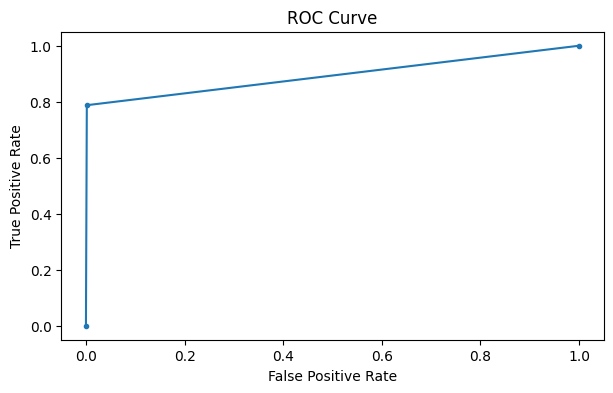

In [42]:
#Decision Tree
adasyn_oversampling(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
1    213229
0    213226
Name: Class, dtype: int64
Accuracy Score:  0.9994803516755147
ROC AUC Score:  0.9158026016745555


Confusion Matrix: 
 [[71071    18]
 [   19    94]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.84      0.83      0.84       113

    accuracy                           1.00     71202
   macro avg       0.92      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202



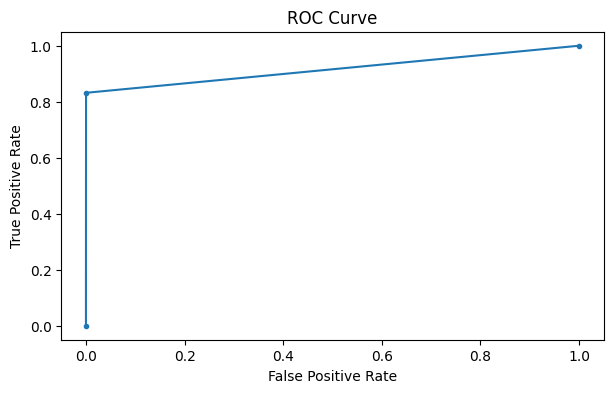

In [43]:
#Random Forest
adasyn_oversampling(RandomForestClassifier(), X_train, y_train, X_test, y_test)


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
1    213229
0    213226
Name: Class, dtype: int64
Accuracy Score:  0.9991994606893064
ROC AUC Score:  0.93333291423178


Confusion Matrix: 
 [[71047    42]
 [   15    98]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.70      0.87      0.77       113

    accuracy                           1.00     71202
   macro avg       0.85      0.93      0.89     71202
weighted avg       1.00      1.00      1.00     71202



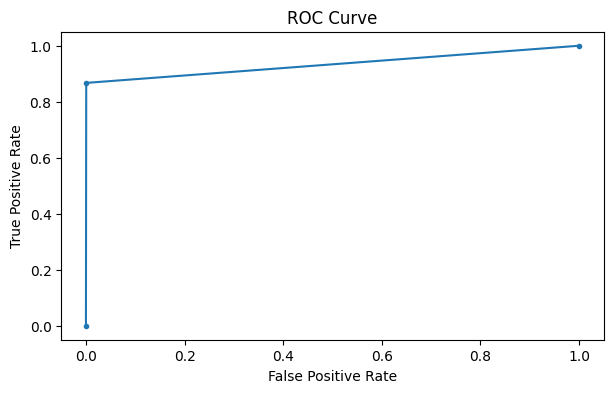

In [44]:
#XGBoost
adasyn_oversampling(XGBClassifier(), X_train, y_train, X_test, y_test)

##### Using Stratifiedkfold

In [48]:
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
adasyn = over_sampling.ADASYN(random_state=42)
model = XGBClassifier()

param = {
            'colsample_bytree': [1.0],
            'gamma': [0.5, 1.0],
            'learning_rate': [0.1,0.01],
            'max_depth': [7],
            'n_estimators': [100],
            'reg_alpha': [0.1],
            'subsample': [0.8]
    }

X_train_cv, y_train_cv = [], []

for i,(train_index, test_index) in enumerate(cv.split(X_train,y_train)):
    X_train_adasyn, y_train_adasyn =  adasyn.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_train_cv.append(X_train_adasyn)
    y_train_cv.append(y_train_adasyn)

X_train_cv = np.concatenate(X_train_cv)
y_train_cv = np.concatenate(y_train_cv)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param, scoring='roc_auc', cv = cv, verbose = 2)
grid_search.fit(X_train_cv, y_train_cv)

# Print the evaluation result
print("Evaluation result:")
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  38.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  38.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  38.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  39.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  39.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=  39.9s
[CV] END colsample_bytree=1.0, gamma=1.0, learning_rate=0.1, max_depth=7, n_estimators=100,

#### Using Optuna

In [70]:
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
    }

    # Instantiate the XGBoostClassifier model with the current hyperparameters
    model = XGBClassifier(**params)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict probabilities for the validation set
    y_pred_prob = model.predict(X_test)

    # Calculate the AUC-ROC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Return the negative AUC-ROC score as Optuna maximizes the objective function
    return auc_score


In [71]:
import xgboost as xgb
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best AUC-ROC score and the best set of hyperparameters
print("Best AUC-ROC score:", study.best_value)
print("Best hyperparameters:", study.best_params)


[I 2023-05-27 19:21:46,734] A new study created in memory with name: no-name-3af085d3-8f50-4df7-978c-01502b72e2df
[I 2023-05-27 19:22:28,449] Trial 0 finished with value: 0.8981949213107787 and parameters: {'max_depth': 7, 'learning_rate': 0.07022610748971313, 'n_estimators': 300, 'subsample': 0.9328564837268589, 'colsample_bytree': 0.8968242737817316, 'gamma': 0.04320833057931528, 'reg_alpha': 4.338079629382811, 'reg_lambda': 0.06383020723928011}. Best is trial 0 with value: 0.8981949213107787.
[I 2023-05-27 19:23:18,424] Trial 1 finished with value: 0.9026126666348815 and parameters: {'max_depth': 5, 'learning_rate': 0.027248317188778508, 'n_estimators': 900, 'subsample': 0.8477693779816701, 'colsample_bytree': 0.5529323632004268, 'gamma': 0.02045446652356282, 'reg_alpha': 0.0044590672151373295, 'reg_lambda': 0.005324231536844148}. Best is trial 1 with value: 0.9026126666348815.
[I 2023-05-27 19:23:37,557] Trial 2 finished with value: 0.8893453637886547 and parameters: {'max_depth': 

Best AUC-ROC score: 0.911483324467883
Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.01622493030999392, 'n_estimators': 1000, 'subsample': 0.6679690272040726, 'colsample_bytree': 0.826270000033233, 'gamma': 0.21315867261438082, 'reg_alpha': 0.007741753225913797, 'reg_lambda': 0.005026132986616495}


class size before random sampling
0    213226
1       379
Name: Class, dtype: int64
class size after random sampling
1    213229
0    213226
Name: Class, dtype: int64
Accuracy Score:  0.9993118170837898
ROC AUC Score:  0.9333891817274544


Confusion Matrix: 
 [[71055    34]
 [   15    98]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.74      0.87      0.80       113

    accuracy                           1.00     71202
   macro avg       0.87      0.93      0.90     71202
weighted avg       1.00      1.00      1.00     71202



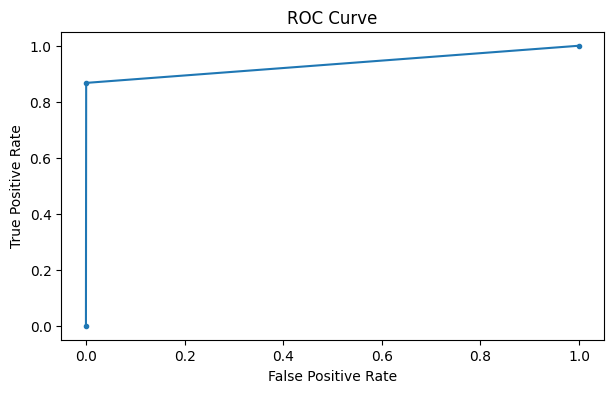

In [73]:
param = {
    'max_depth': 9,
    'learning_rate': 0.01622493030999392,
    'n_estimators': 1000,
    'subsample': 0.6679690272040726,
    'colsample_bytree': 0.826270000033233,
    'gamma': 0.21315867261438082,
    'reg_alpha': 0.007741753225913797,
    'reg_lambda': 0.005026132986616495
    }

#XGBoost
clf = adasyn_oversampling(XGBClassifier(**param), X_train, y_train, X_test, y_test)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


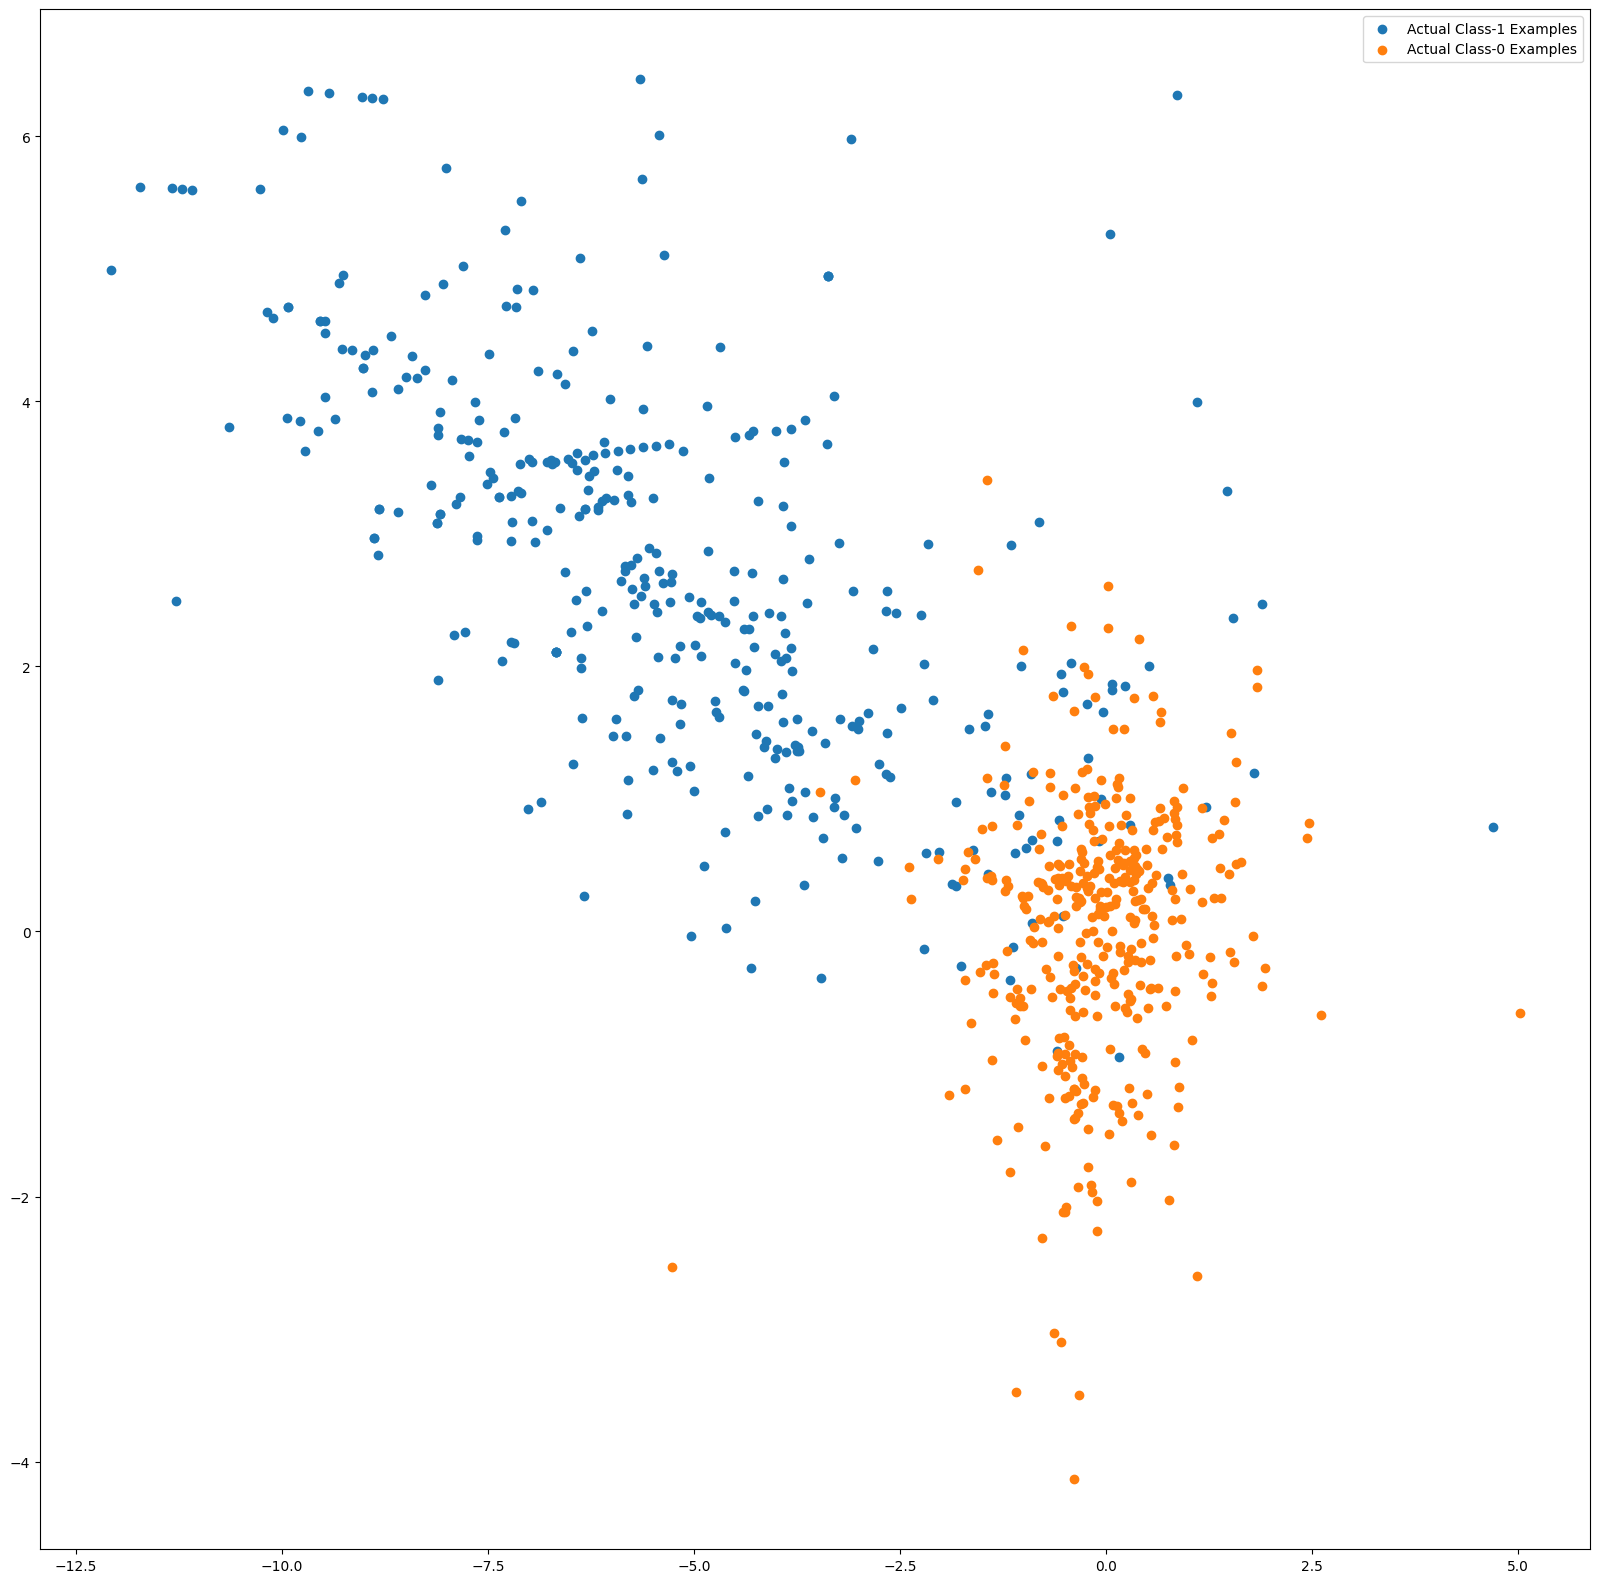

In [74]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [75]:
#### Print the FPR,TPR & select the best threshold from the roc curve
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print FPR, TPR, and corresponding thresholds
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.4f} | FPR: {fpr[i]:.4f} | TPR: {tpr[i]:.4f}")

# Find the index of the threshold that gives the best balance between FPR and TPR
best_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_index]
print("Best Threshold:", best_threshold)

Threshold: 2.0000 | FPR: 0.0000 | TPR: 0.0000
Threshold: 1.0000 | FPR: 0.0005 | TPR: 0.8673
Threshold: 0.0000 | FPR: 1.0000 | TPR: 1.0000
Best Threshold: 1


In [76]:

from sklearn import metrics
print('Train auc =', metrics.roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9333891817274544
1
